* Cubic Discriminant https://brilliant.org/wiki/cubic-discriminant/

In [1]:
import sympy as sp
from src.core.sos_manager import SOS_Manager
from src.utils.text_process import PreprocessText as pl
from src.core.pqrsos.pqr_utils import pqr_ker, pqr_pqrt, pqr_cyc
from src.utils.text_process import poly_get_standard_form, poly_get_factor_form

import sympy as sp 
a,b,c,x,y,z,w,u,v,r,s,t,p,q = sp.symbols('a b c x y z w u v r s t p q')
def monom_of(x, m):
    m = (m[0], m[1], sum(x.monoms()[0][-3:]) - m[0]-m[1])
    # print(x.monoms()[0])
    for i in range(m[0]):
        x = x.diff('a')
    x = x.subs('a',0)
    for i in range(m[1]):
        x = x.diff('b')
    x = x.subs('b',0)
    for i in range(m[2]):
        x = x.diff('c')
    x = x.subs('c',0)
    return x / sp.factorial(m[0]) / sp.factorial(m[1]) / sp.factorial(m[2])

def cubicdiscriminant(a,b,c,d):
    return b*b*c*c-4*a*c**3-4*b**3*d-27*a*a*d*d+18*a*b*c*d

def swa(x):
    a = str(x).replace(' ','').replace('**','^')
    print(a)
    return a

def sdesmos(x):
    a = (sp.latex(x).replace(' ',''))
    print(a)
    return a

def qinjiushao(f, x = None):
    if x is None: x = f.as_poly().gens
    f = f.as_poly(x[0])
    s = 0
    for c in f.all_coeffs():
        s *= x[0]
        s += qinjiushao(c, x[1:]) if len(x) > 1 else c
    return s

## Quartic Uncentered

In [186]:
a,b,c,x,y,z,m,n,p,q,r,s,t,u,v,w = sp.symbols('a b c x y z m n p q r s t u v w')
# pl('s((a2-b2+u(ab-ac)+v(bc-ab))2)+xs(a2-wab)2').as_expr().subs(w, (u**2 - u*v - u + v**2 - v + 3)/(u + v - 1)).as_poly(a,b,c)
poly = pl('s(a4+xa3b+ya2b2+zab3+ra2bc)').as_expr().subs(x,p).subs(y,n).subs(z,q).as_poly(a,b,c)
poly -= pl('zs(a2-wab)2').as_poly(a,b,c) # w > 1
m2, p2, n2, q2 = [monom_of(poly, (4-i,i,0)) for i in range(4)]
det = (3*m2*(m2+n2)-(p2**2+p2*q2+q2**2)).as_poly(w)
cz2, cz1, cz0 = det.all_coeffs()
# dett = ((cz1**2 - 4*cz2*cz0).factor() / 3).as_poly(z)
# sp.polys.discriminant(dett).factor().args[-1]
dett = det.subs(z, s / (1 - w)**2 / 9).factor().args[-1].as_poly(w)
dettt = sp.polys.discriminant(dett).factor().args[-1].as_poly(s).as_expr().subs(s,3*(1+p+n+q+r)).factor().args[-1].as_poly(r)

In [202]:
w_ = 1 - sp.sqrt(s) / 3
# dett.all_coeffs()
# monom_of( pl('s(a2-wab)2'),(2,1,1))
# dett.all_coeffs()[0].subs(s,3*(1+p+n+q+r)).factor()#.diff(w).subs(w,1).factor()
detr = (det.subs(z, s / (1 - w)**2 / 9).factor().subs(s,3*(1+p+n+q+r)))
p_, q_, n_, r_ = -3, 0, 2, 1
p_, q_, n_, r_ = -3, -1, sp.S(7)/2, 1
# p_, q_, n_, r_ = sp.S(5708)/1431, 4, 6, sp.S(52028)/4293
# p_, q_, n_, r_ = sp.S(5708)/1431, 4, sp.S(8618)/14131, sp.S(51932)/4293
# p_, q_, n_, r_ = -sp.S(5)/4, sp.S(-9)/4, sp.S(7)/4, 1
p_, q_, n_, r_ = -3, -2, sp.S(7)/2, 5
p_ = sp.S(p_)
# sdesmos(detr.subs(p,-3).subs(q,0).subs(n,2).subs(r,1).factor().subs(w,x))
sdesmos(detr.subs(p,p_).subs(q,q_).subs(n,n_).subs(r,r_).factor().subs(w,x))
sdesmos(dett.subs(s,3*(1+p+n+q+r)).subs(p,p_).subs(q,q_).subs(n,n_).subs(r,r_).factor().subs(w,x))
print('r2 =', (sp.solve(dett.all_coeffs()[0], s)[0] / 3 - 1- p_-q_-n_).subs(p,p_).subs(q,q_).subs(n,n_).subs(r,r_))
print('sqrt(s)/3 =', sp.sqrt(3*(sp.S(1)+p_+q_+n_+r_))/3)

-\frac{20x^{3}-132x^{2}+231x-38}{2\left(x-1\right)^{3}}
90x^{3}-594x^{2}+\frac{2079x}{2}-171
r2 = -5
sqrt(s)/3 = sqrt(6)/2


In [183]:
# dett.as_expr().subs(s, sp.solve(dett.all_coeffs()[0], s)[0]).factor().as_poly(w).all_coeffs()[1].subs(n,(p*p+q*q+p*q-3)/3+t).subs(p,-q-1).factor()
poly = pl('s(a4+xa3b-(x+1)ab3+ya2b2+za2bc)').as_expr().subs(z,r).subs(y,n).subs(x,p).as_poly(a,b,c)
poly -= pl('ws(ab)2').as_poly(a,b,c)
m2, p2, n2, q2 = [monom_of(poly, (4-i,i,0)) for i in range(4)]
det = (3*m2*(m2+n2)-(p2**2+p2*q2+q2**2)).as_poly(w) # 3n - p^2 - p + 2 >= 0
# (poly.subs(a,1).subs(b,1).subs(c,1) - (w*9)) #.subs(w,(3*n-p*p-p+2)/3).factor()
# w <= (n + r) / 6
# det.subs(w, (n+r)/6).subs(r,sp.solve(dett.all_coeffs()[0], s)[0] - 1 - p - n - q).subs(q,-1-p).factor() <= 0

# r = 8*n-3*p*p-3*p+6
# (n+r) / 6 >= (3*n-p*p-p+2) / 3
# ((9*n-3*p*p-3*p+6)/6 - (3*n-p*p-p+2)/3).factor() >= 0
print(sp.solve(det,w)[0].factor())

-(-3*n + p**2 + p - 2)/3


In [12]:
# det.subs(z, s / (1 - w)**2 / 9).factor().subs(s,s*s).subs(w, 1 + s/3).factor()
# det.subs(z,s / (1 - w)**2 / 9).factor()
# ker2, ker1, ker0 = det.subs(z, s / (1 - w)**2 / 9).factor().subs(s,s*s).subs(w, 1 + s/3).factor().as_poly(s).all_coeffs()
# (ker1**2 /4 - ker2*ker0).factor() #== -3(p-q)^2 <= 0
det2 = sp.collect(dett.as_expr().subs(s,s*s).subs(w, 1-s /3).factor(), s)#.factor() # n has been canceled!!
ker2, ker1, ker0 = det2.args[-1].as_poly(s).all_coeffs()
(ker1**2 /4 - ker2*ker0).factor() #== -3(p-q)^2 <= 0
# conclusion: det2 <= 0
dett

In [23]:
p,n,q,r,t=sp.symbols('p n q r t')
# y0 = pl('(a4+p*a3b+n*a2b2+q*ab3+r*a2bc)',cyc=True)
# y = y0-pl('s(a2-tbc)2')*(1+p+n+q+r)/3/(t-1)**2
# sp.collect(y.as_expr(),'a')
u = sp.symbols('u')#(1+p+n+q+r)/3/(t-1)**2
m1,p1,n1,q1,r1 = 1-u, p+2*t*u, n-(t*t+2)*u, q+2*t*u, r-(2*t*t-2*t)*u
# monom_of(pl('s(a2-tbc)2'),(2,1,1))
# det = sp.collect((3*m1*(m1+n1)-(p1*p1+q1*q1+p1*q1)).factor().args[-1],t)
# # det.subs(zip('pnqr',(-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5))).factor()
# d1 = det.args[10]/t**3
# d2 = det.args[9]/t/t
# d3 = det.args[8]/t
# d4 = det.subs('t',0)
# # cubicdiscriminant(d1,d2,d3,d4).factor()
# sp.collect(sp.expand(det),r)
# u,v=-(p1+2*q1)/3/m1,-(q1+2*p1)/3/m1
var = (-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5)
var = (-sp.S(14)/3,18,-sp.S(14)/3,-sp.S(26)/3)
var = (sp.S(23)/8,6,4,sp.S(105)/8)
var =  (sp.S(17124)/4293,sp.S(25758)/4293,sp.S(17172)/4293,sp.S(52028)/4293)
var = (-6,11,-6,12)
# (v).subs(zip('pnqr',var)).factor().subs(t,sp.S(3)/2)
# # b = sp.symbols('b')
# # a=sp.sympify('(b*(b+u-v)-1)/(b*u-v)')
# # f1,f2 = sp.fraction(((a*a+b*b+1)/(a*b+b+a)).factor())
# # eq = sp.sympify('b**3+((v-u)*(u*v+u+v-2)+u**3+1)/(1-u*v)*b*b+((v-u)*(u*v+u+v-2)-v**3-1)/(1-u*v)*b-1')
# # # sp.collect(sp.expand(sp.collect(sp.expand(f1-f2),'b')-sp.sympify(u*u-u+1)*b*eq),b)
# # eq2 = sp.collect(sp.expand(sp.collect(sp.expand(f1-sp.sympify('c')*f2),'b')-sp.sympify('u*u+1-c*u')*b*eq),b)
# # eq3 = sp.collect((eq2.args[-2]/b/b/b+eq2.subs(b,0)).factor().args[-1],'c')
# # -(eq3.subs('c',0)/eq3.diff('c').subs('c',0)).factor()#.subs('u',1).subs('v',2)
# eq4 = sp.collect((((u*u+v*v-u*v-u-v+3)/(u+v-1))-t).factor().args[-1],t)
# sp.polys.nroots(eq4.subs(zip('pnqr',var)))
# eq4
detu = sp.collect((3*m1*(m1+n1)-(p1*p1+q1*q1+p1*q1)).factor(),'u')
detu2 = detu.diff('u').diff('u').subs('u',0)/2
detu1 = detu.diff('u').subs('u',0)
detu0 = detu.subs('u',0)
(detu1**2-4*detu2*detu0).subs(zip('pnqr',var)).factor()
var = (-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5)
det = sp.collect((detu1**2-4*detu2*detu0).factor()/9,'t')
print(sp.latex(det.subs(zip('pnqr',var)).factor().subs('t','x')))

x^{4} - \frac{108 x^{3}}{5} + 102 x^{2} - \frac{4212 x}{25} + \frac{2277}{25}


In [15]:
print(sp.latex((det).subs(zip('pnqr',var)).factor().subs('t','x')))
# sp.collect(sp.expand(eq4.subs(r,3*(t-1)**2-p-n-q)).factor(),t)
# eq4.subs(t,1).factor()
var = (-3,sp.S(19)/5,sp.S(-12)/5,sp.S(6)/5)
var = (-6,11,-6,12)
# print(sp.latex((eq4).subs(zip('pnqr',var)).factor().subs('t','x')))
# sp.collect(sp.expand(det),'r')
# sp.collect(sp.expand(eq4),'r')
# sp.collect(sp.collect(sp.expand(det+(t+1)*eq4),'r').factor().args[-1]-eq4,'t')
# det.subs(zip('pnq',var[:-1])).subs('t',3).factor()
# ==============================
# r such that det >= 0 holds for any t, to relax the condition, delta <= 0
rr2=det.diff('r').diff('r')/2
rr1=det.diff('r').subs('r',0)
rr0=det.subs('r',0)
delta = -(4*rr2*rr0-rr1*rr1).factor()
# sp.collect(delta.args[-1],'t')
var = (-6,11,-6,12)
print('0 >= det =', sp.latex((det).subs(zip('pnqr',var)).factor().subs('t','x')))
print(sp.latex((3*(t-1)**2-(1+n+p+q+r)).subs(zip('pnqr',var)).subs('t','x')))
print('0 == eq =',sp.latex((eq4).subs(zip('pnqr',var)).factor().subs('t','x')))
nrts = sp.polys.nroots(((eq4).subs(zip('pnqr',var)).factor().subs('t','x')))
print(nrts)
print([((1+p+n+q+r)/3).subs(zip('pnqr',var))/(nr-1)**2 for nr in nrts])
# (det).subs(zip('pnqr',var)).subs(t,nrts[1])

In [16]:
# var = (-6,11,-6,12)
# print(sp.collect((3*m1*(m1+n1)-(p1*p1+q1*q1+p1*q1)).factor().args[-1],t).subs(zip('pnqr',var)).subs(t,nrts[1]))
# u,v=-(p1+2*q1)/3/m1,-(q1+2*p1)/3/m1
# monom_of(pl('s(a2-xab)2'),(2,1,1))
# pl('s(a2-xab)2').subs(zip('abc',(1,1,1)))
# (m1+p1+n1+q1+r1).factor()
# u.subs(zip('pnqr',var)).subs('t',nrts[1])
# a,b,c=sp.symbols('a b c')
# y = (a**4+b**4+c**4)*m1+(a**3*b+b**3*c+c**3*a)*p1+(a*a*b*b+b*b*c*c+c*c*a*a)*n1+(a*b**3+b*c**3+c*a**3)*q1+r1*a*b*c*(a+b+c)
# y = y.subs(zip('pnqr',var)).subs('t',nrts[1])
# yyy = sp.expand((y-m1/2*((a*a-b*b-u*a*c+v*b*c)**2+(b*b-c*c-u*b*a+v*c*a)**2+(c*c-a*a-u*c*b+v*a*b)**2)).subs(zip('pnqr',var)).subs('t',nrts[1]))


## Quintic Uncentered Symmetric

`s(a4b+a4c+x(a3b2+a3c2))-ys(a3bc)+zs(a2b2c)`

In [318]:
poly = pl('s(a4b+a4c+x(a3b2+a3c2))-ys(a3bc)+zs(a2b2c)').as_poly(a,b,c)
ker = pqr_cyc(poly)[0].subs(p,1).subs(q,(1-t*t)/3)
ker = ker.subs(r,sp.solve(pqr_ker().subs(p,1).subs(q,(1-t*t)/3).factor().args[-1],r)[0]).factor().args[-1].as_poly(t)
# ker.subs(x,3).subs(y,18).subs(z,10).factor()
det = sp.polys.discriminant(ker).factor().args[-1]
det.as_poly(z)

Poly(16*z**4 + (-4*x**2 + 4*x*y - 276*x - y**2 - 30*y - 197)*z**3 + (72*x**3 - 64*x**2*y + 236*x**2 + 10*x*y**2 - 550*x*y - 38*x + 2*y**3 - 60*y**2 - 693*y + 98)*z**2 + (-100*x**4 + 212*x**3*y - 768*x**3 - 121*x**2*y**2 - 440*x**2*y + 2084*x**2 + 12*x*y**3 - 216*x*y**2 + 2772*x*y + 2136*x + 4*y**4 + 172*y**3 + 285*y**2 + 2068*y + 196)*z + 248*x**5 - 196*x**4*y - 1208*x**4 + 10*x**3*y**2 - 416*x**3*y + 504*x**3 - 19*x**2*y**3 + 306*x**2*y**2 + 12*x**2*y + 632*x**2 + 32*x*y**4 + 38*x*y**3 - 870*x*y**2 - 160*x*y - 3928*x - 8*y**5 + 8*y**4 - 491*y**3 + 802*y**2 - 2548*y - 1832, z, domain='ZZ[x,y]')

In [360]:
# poly = pl('s(ab(a+b)(a2-b2+u(ab-ac)+u(bc-ab))+vabc((2u-1)a2-(u2-2u+3)ab)+wab((u-1)(a2c-b2c)-u(a2b-ab2)))')
# monom_of(poly,(3,1,1)) # 1-uw, 1-2u, -u2+2u-3
# det.subs(x,1-u*w).subs(y,v*(1-2*u)).subs(z,v*(-u*u+2*u-3)).factor()
poly = pl('s(c(a2-b2+u(ab-ac)+v(bc-ab))2)')  # u^2-2v  v^2-2u
monom_of(poly,(3,1,1))

-2*u*v

In [368]:
# ((u*u - 3)**2 /4- 2*u - 3).factor()
# sp.solve((16-x)/(3-x)- sp.S(64)/9)
sp.sqrt(832/117)

2.66666666666667

# Quintic Simple

For $a,b,c\geqslant 0$, we have $\displaystyle \sum ac^2(b-c)^2 \geqslant x abc\displaystyle \sum (a^2-ab)$
where 

$x =-\dfrac{53}{9\sqrt[3]{\frac{457}{54}+\frac{31\sqrt{93}}{18}}}+\dfrac{2}{3}+\displaystyle \sqrt[3]{\frac{457}{54}+\frac{31\sqrt{93}}{18}}\approx 1.5814122$ is the root of $x^{3}-2x^{2}+19x-29=0$.

 https://tieba.baidu.com/p/7726502326
 
$\displaystyle \sum (a^4b+xa^2b^2c)\geqslant y\displaystyle \sum a^3bc$

where $x,y$ is on the certain branch of
$$\begin{aligned}&\Delta_1 = 16x^{4}+\left(-8y^{2}-64y-96\right)x^{3}+\left(y^{4}+32y^{3}+96y^{2}-4y+1144\right)x^{2}\\ &+\left(-4y^{5}-34y^{4}+41y^{3}-554y^{2}+520y-1859\right)x\\ & +4y^{6}-12y^{5}+99y^{4}-248y^{3}+858y^{2}-1521y+2197=0\end{aligned}$$

Rational Nondegenerated Solutions: $\left(\dfrac 92, \dfrac{19}{4}\right)$, $\left(\dfrac{377}{144}, \dfrac{65}{18}\right)$, $\left(\dfrac{221}{9}, \dfrac{94}{9}\right)$, $\left(\dfrac{4233}{400},\dfrac{353}{50}\right)$, $(39,13)$

Rational Parametrization: $u^{4}-u^{3}v-3u^{3}+u^{2}v^{2}+6u^{2}-2uv-5u-v+4=0$. 

When $1<t\leqslant \frac{28}{9\sqrt[3]{\frac{4\sqrt{93}}{9}+\frac{188}{27}}}+\frac{5}{3}+\sqrt[3]{\frac{4\sqrt{93}}{9}+\frac{188}{27}}\approx 5.295798$
$$\left\{\begin{aligned}& u=\frac{2t\left(t-1\right)}{t^{2}+3}\quad\quad v = \frac{2\left(t^{4}-t^{3}+t^{2}+t+6\right)}{\left(t-1\right)^{2}\left(t^{2}+3\right)}
\quad\quad \\ & w = \frac{2t\left(t-1\right)^{2}\left(t^{2}+3\right)}{\left(t+1\right)\left(3t^{4}-6t^{3}+4t^{2}+6t+9\right)}\quad\quad z = \frac{-2t^{3}+10t^{2}+2t+6}{\left(t-1\right)^{2}\left(t+1\right)^{2}} \quad\quad \phi =\frac{t^{2}-2t+5}{\left(t-1\right)^{2}}\end{aligned}\right.$$
then 
$$\sum a^2c\left[a^2-b^2+u(ab-ac)+v(bc-ab)\right]
\\ +w\sum ac\left[(uv-1)(a^2c-b^2c)-(u^2+v)(a^2b-abc)+(v^2+u)(ab^2-abc)\right]-zabc\sum (a^2-\phi ab)\geqslant 0.$$

**命题**  (forever豪3) 当 $1<t\leqslant \frac{28}{9\sqrt[3]{\frac{4\sqrt{93}}{9}+\frac{188}{27}}}+\frac{5}{3}+\sqrt[3]{\frac{4\sqrt{93}}{9}+\frac{188}{27}}\approx 5.295798$ (该上界是 $-t^3+5t^2+t+3=0$ 的根), 则
$$f(a,b,c)=\sum \left(a^4c-\frac{2\cdot\left(2t^{4}-3t^{3}+5t^{2}+7t+5\right)}{\left(t-1\right)^{2}\left(t+1\right)^{2}}a^3bc+\frac{3t^{6}-12t^{5}+27t^{4}-24t^{3}+33t^{2}+4t+33}{\left(t-1\right)^{4}\left(t+1\right)^{2}}a^2b^2c\right)\geqslant 0$$

**证明** 令

$$\left\{\begin{aligned}& u=\frac{2t\left(t-1\right)}{t^{2}+3}\quad\quad v = \frac{2\left(t^{4}-t^{3}+t^{2}+t+6\right)}{\left(t-1\right)^{2}\left(t^{2}+3\right)}
\quad\quad \\ & g(a,b,c) = u\left(uv-1\right)(a+b)b^{2}-\left(u+1\right)\left(uv-1\right)a^{2}c+\left(3u^{3}-6u^{2}+uv+6u-4\right)abc-\left(4u^{3}-5u^{2}+uv+6u+v-3\right)b^{2}c+\left((u+1)(u+v)+u^2(u-v)\right)bc^{2}\end{aligned}\right.$$

则

$$\begin{aligned}
&\quad \ f(a,b,c)\sum \left(a^2+\frac{17t^{4}-28t^{3}+30t^{2}-12t+9}{4t^{2}\left(t-1\right)^{2}}ab\right)
\\ & =\frac{1}{u^2(uv-1)^2}\sum_{cyc} a\cdot g(a,b,c)^2 +\frac{\left(3t^{2}+1\right)\left(7t^{2}-12t+9\right)\left(-t^{3}+5t^{2}+t+3\right)}{8t^{2}\left(t-1\right)^{2}\left(t+1\right)^{2}}\left[\sum_{cyc}a^2 -\frac{t^{2}-2t+5}{\left(t-1\right)^{2}}\sum_{cyc} ab\right]^2
\\ & + \frac{\left(3t-1\right)\left(t^{2}+3\right)^2(3u+1)}{16t^{2}\left(t+1\right)^{2}}\sum_{cyc}abc\left[a^2-b^2+u(ab-ac)+v(bc-ab)\right]^2\\ & \geqslant 0
\end{aligned}$$

In [2]:
# https://tieba.baidu.com/p/7726502326
a,b,c,x,y,z,r,s,t,u,v,w = sp.symbols('a b c x y z r s t u v w')
det = 16*x**4+(-8*y*y-64*y-96)*x**3+(y**4+32*y**3+96*y*y-4*y+1144)*x*x+(-4*y**5-34*y**4+41*y**3-554*y*y+520*y-1859)*x+4*y**6-12*y**5+99*y**4-248*y**3+858*y**2-1521*y+2197
# det.subs(x,39).subs(y,13)
# 9/2, 19/4        -> 1,     3
# 377/144, 65/18   -> 10/7,  67/28
# 221/9, 94/9      -> 4/7,   40/7
# 4233/400, 353/50 -> 14/19, 311/76
# 39, 13           -> 1/2,   (17+3*sqrt(13))/4
# a_ = (b*b+b*(u-v)-1)/(b*u-v)
# # eq1 = sp.factor((a_**2+b**2+1)/(a_*b +a_+b)-x).args[-1].as_poly(b)
# # eq2 = b**3+((v-u)*(u*v+u+v-2)+u**3+1)/(1-u*v)*b*b+((v-u)*(u*v+u+v-2)-v**3-1)/(1-u*v)*b-1
# # sp.solve(divmod(eq1, eq2)[1],x)
# # x_ = (u**2 - u*v - u + v**2 - v + 3)/(u + v - 1)
# poly = pl('s(ab4+xa2b2c-ya3bc)-s((a2c)(a2-b2+u(ab-ac)+v(bc-ab)))-ws(ac((uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)))-zabcs(a2-rab)').as_expr()
# poly = poly.subs(w,u/(u*v-1)).subs(r,(u**2 - u*v - u + v**2 - v + 3)/(u + v - 1)).as_poly(a,b,c)
# y_ = sp.solve(monom_of(poly, (3,1,1)), y)[0]
# x_ = sp.solve(monom_of(poly, (2,2,1)), x)[0]
# eq = det.subs(x,x_).subs(y,y_).factor()
# eq = eq.args[-1].as_poly(z)
# poly
a,b,c,x,y,z,r,s,t,u,v,w = sp.symbols('a b c x y z r s t u v w')
data = [[1,3],[10/7,67/28],[4/7,40/7],[14/19,311/76],[0.9573069937023805,3.114712194275017],[1.0542837430550482,2.8756006464592354],[1.243616299195432,2.5727255995025606],
[0.8071445209044495,3.6878098983277976],[0.7762685030888823,3.8513910088085543],[ 0.9222845980605623 , 3.22211035936345],[0.7909985670881408 , 3.770861437520827],[0.7627442199307246 , 3.9296341303871443],
[0.8249745509231453 , 3.601954067916784],[1.1281887500886578 , 2.737030629889956],[1.1895717941712602 , 2.643044968766932],[0.6614373432526085 , 4.681333936986593],[0.6261883829170461 , 5.033344918047494],[0.5,6.9541634566]]
# import numpy as np
# data = np.array(data).T
# u_, v_ = data
# data2 = np.stack([u_,u_*v_,u_*v_**2,u_**2,u_**3,v_,u_**3*v_,v_**2]).T[:,:]
# relation, res, _, __ = np.linalg.lstsq(data2, np.ones(data2.shape[0]), rcond = None)
# print('relation =', relation)
# print('residual =', res)
# from matplotlib import pyplot as plt
# plt.scatter(*(data))
# plt.show()

# ### apply pqr directly
# part1, part2 = pqr_cyc(pl('s((a2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ws(ac((uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)))+zabcs(a2-xab)').as_poly(a,b,c))
# poly = ((part1**2-part2**2*pqr_ker())).as_poly(r)
# r2,r1,r0 = poly.all_coeffs()
# polyker = (r1**2-4*r2*r0).factor().args[-1].as_poly(z)
# polyker = polyker.subs('p',1).subs(w,u/(u*v-1)).subs('q',1/(x+2)).subs(x,(u**2 - u*v - u + v**2 - v + 3)/(u + v - 1))
# polyker = polyker.factor()#.as_poly(z)
# detuv   = polyker.args[-1].args[0]
detuv = u**4 - u**3*v - 3*u**3 + u**2*v**2 + 6*u**2 - 2*u*v - 5*u - v + 4
v2, v1, v0 = detuv.as_poly(v).all_coeffs()
delta = (v1**2-4*v0*v2).factor()  # -3u^2 + 6u + 1 = r^2  => 3(u-1)^2 + z^2 = 4
# idea: vieta jump with (u, z) = (2, 1)
# u2 = sp.solve((3*(x-1)**2+y**2-4).subs(y,t*(x-2)+1).factor().args[-1],x)[0]
# v2 = sp.solve(detuv.subs(u,u2).factor().args[-1],v)[0].factor()
t = sp.symbols('t') 
# t = sp.S(15)/5#sp.S(5.295798)#sp.S(36)/3
u2 = 2*t*(t - 1)/(t**2 + 3)
v2 = 2*(t**4 - t**3 + t**2 + t + 6)/((t - 1)**2*(t**2 + 3))
w2 = (u2 / (u2*v2 - 1)).factor()
x2 = (t**2 - 2*t + 5)/(t - 1)**2

# eqz = ((r1**2-4*r2*r0).factor().args[-1].subs('p',1).subs(u,u2).subs(v,v2).subs(w,((u2/(u2*v2-1))).factor()).subs(x,((u**2 - u*v - u + v**2 - v + 3)/(u + v - 1)).subs(u,u2).subs(v,v2).factor()))
# eqz = eqz.factor() # .subs('q',(1-r*r)/3).factor()
# eqzz = eqz.args[-1].subs('q',sp.solve(eqz.args[3],'q')[0]).factor()
# z_ = sp.solve(eqzz.args[-1],z)[0].factor()
z2 = -2*(t**3 - 5*t**2 - t - 3)/((t - 1)**2*(t + 1)**2)
poly = pl('s((a2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ws(ac((uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)))-zabcs(a2-rab)').subs(w,w2).subs(z,z2).subs(r,x2).subs(u,u2).subs(v,v2).as_poly(a,b,c)
print('u2, v2 =', u2, v2)
print(f's((a2c)(a2-b2+{u2}(ab-ac)+{v2}(bc-ab)))+{w2}s(ac({u2*v2-1}(a2c-b2c)-{u2*u2+v2}(a2b-abc)+{v2*v2+u2}(ab2-abc)))-{z2}abcs(a2-{x2}ab)')
print(f's(a4c-{-(-24*t**4 + 36*t**3 - 60*t**2 - 84*t - 60)/(6*(t**4 - 2*t**2 + 1))}a3bc+{(3*t**6 - 12*t**5 + 27*t**4 - 24*t**3 + 33*t**2 + 4*t + 33)/((t - 1)**4*(t + 1)**2)}a2b2c)')

# ((v2+u2**2)/(u2*v2-1)).factor()
# ((u2+v2-1)+3*(1-u2*v2)/(u2+v2-1)).factor() = 4/(t-1)^2
# ((u2**2-2*u2-v2+2) / (u2*v2-1)).factor() = -2/(t-1)

u2, v2 = 2*t*(t - 1)/(t**2 + 3) (2*t**4 - 2*t**3 + 2*t**2 + 2*t + 12)/((t - 1)**2*(t**2 + 3))
s((a2c)(a2-b2+2*t*(t - 1)/(t**2 + 3)(ab-ac)+(2*t**4 - 2*t**3 + 2*t**2 + 2*t + 12)/((t - 1)**2*(t**2 + 3))(bc-ab)))+2*t*(t - 1)**2*(t**2 + 3)/((t + 1)*(3*t**4 - 6*t**3 + 4*t**2 + 6*t + 9))s(ac(2*t*(2*t**4 - 2*t**3 + 2*t**2 + 2*t + 12)/((t - 1)*(t**2 + 3)**2) - 1(a2c-b2c)-4*t**2*(t - 1)**2/(t**2 + 3)**2 + (2*t**4 - 2*t**3 + 2*t**2 + 2*t + 12)/((t - 1)**2*(t**2 + 3))(a2b-abc)+2*t*(t - 1)/(t**2 + 3) + (2*t**4 - 2*t**3 + 2*t**2 + 2*t + 12)**2/((t - 1)**4*(t**2 + 3)**2)(ab2-abc)))-(-2*t**3 + 10*t**2 + 2*t + 6)/((t - 1)**2*(t + 1)**2)abcs(a2-(t**2 - 2*t + 5)/(t - 1)**2ab)
s(a4c-(24*t**4 - 36*t**3 + 60*t**2 + 84*t + 60)/(6*t**4 - 12*t**2 + 6)a3bc+(3*t**6 - 12*t**5 + 27*t**4 - 24*t**3 + 33*t**2 + 4*t + 33)/((t - 1)**4*(t + 1)**2)a2b2c)


In [600]:
u_, v_ = sp.symbols('u v')
poly2 = pl(f's(a((u+1)(({1-u_*v_})c(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+{u_}(({u_*v_-1})(b2a-c2a)-({u_*u_+v_})(b2c-abc)+({v_*v_+u_})(bc2-abc)))+xb(b2-c2+u(bc-ba)+v(ca-bc)))2)')
poly2 = poly2.as_expr().subs(x,u*(u*v - 1)).as_poly(a,b,c).subs(u,u2).subs(v,v2)#.as_poly(a,b,c)#.subs(u,1).subs(v,3)
poly2 = sum(_.factor() for _ in poly2.args)
# x = sp.solve(monom_of(poly2,(1,2,0)) - monom_of(poly2,(0,3,0)),x)
poly3 = poly*pl('s(a2+zab)').subs(z,(17*t**4 - 28*t**3 + 30*t**2 - 12*t + 9)/(4*t**2*(t - 1)**2)).as_expr() - 1/(u2*(u2*v2-1))**2 *poly2
poly3 = poly3 - (-18*(3*t**2 + 1)*(7*t**2 - 12*t + 9)*(t**3 - 5*t**2 - t - 3)/(t**2*(t - 1)**6*(t + 1)**2))/9/(1-x2)**2 * pl('abcs(a2-rab)2').as_expr().subs('r',x2)
poly3 = poly3 - (3*t - 1)*(t**2 + 3)*(7*t**2 - 6*t + 3)/(16*t**2*(t + 1)**2)* pl('abcs((a2-b2+u(ab-ac)+v(bc-ab))2)').as_expr().subs(u,u2).subs(v,v2)
print(poly3)

Poly(0, a, b, c, domain='ZZ(t)')


### Quintic Uncentered

**命题** (forever豪3, 2022年12月21日) 若 $u\geqslant 0, \ u^{3}-u^{2}-uv+u+1\leqslant 0,\ u^{3}+u^{2}v-u^{2}-3uv-u-v+4\neq 0$,
$$\begin{aligned}r_1 &= -\frac{u^{4}-u^{3}v-3u^{3}+u^{2}v^{2}+6u^{2}-2uv-5u-v+4}{\left(u+v-1\right)\left(u^{2}-2u-v+2\right)}\\ r_2 &= -\frac{\left(\begin{aligned}u^{6}+u^{5}v& -4u^{5} -u^{4}v^{2}-4u^{4}v+9u^{4}+2u^{3}v^{3}-2u^{3}v^{2}+13u^{3}v-12u^{3}
 -4u^{2}v^{3}\\ &  +3u^{2}v^{2}-14u^{2}v+7u^{2}-2uv^{4}+6uv^{3}-4uv^{2}+9uv+2v^{3}-5v^{2}+4v-4\end{aligned}\right)}{\left(uv-1\right)\left(u+v-1\right)\left(u^{2}-2u-v+2\right)}
\\ r_3 &= \frac{\left(\begin{aligned} u^{7} -2u^{6}v& -4u^{6} +3u^{5}v^{2}+3u^{5}v+13u^{5}-2u^{4}v^{3}-3u^{4}v^{2} -6u^{4}v-23u^{4}+u^{3}v^{4}-2u^{3}v^{3}\\ & +12u^{3}v^{2}-7u^{3}v+32u^{3}+u^{2}v^{4}  -2u^{2}v^{3}-6u^{2}v^{2}+10u^{2}v-22u^{2}\\ &  -uv^{5} +3uv^{4}-11uv^{3}+20uv^{2}-18uv+9u+v^{4}-2v^{3}+6v^{2}-8v+6\end{aligned}\right)}{\left(uv-1\right)\left(u+v-1\right)\left(u^{2}-2u-v+2\right)}
\end{aligned}$$
且满足 $r_1\geqslant 0$  时,
则
$$f(a,b,c)=\sum ab^4+r_1\sum a^2b^3+r_2\sum a^3bc+r_3\sum a^2b^2c\geqslant 0$$

**证明** 注意到 (?): 令
$$ \begin{aligned}& \varphi = \frac{\left(\begin{aligned} -u^{11}+4u^{10}& +7u^{9}v-9u^{9}-u^{8}v^{3}+7u^{8}v^{2}-24u^{8}v+5u^{8}-6u^{7}v^{3}-18u^{7}v^{2}+35u^{7}v+16u^{7}+2u^{6}v^{4}\\ &  -7u^{6}v^{3}+58u^{6}v^{2}-16u^{6}v-46u^{6}+8u^{5}v^{4}-10u^{5}v^{3}-28u^{5}v^{2}-70u^{5}v+53u^{5}+12u^{4}v^{4}\\ &  -38u^{4}v^{3}+54u^{4}v^{2} +100u^{4}v-6u^{4}+8u^{3}v^{4}-56u^{3}v^{3}+50u^{3}v^{2}-145u^{3}v -47u^{3}+2u^{2}v^{4}\\ &  -33u^{2}v^{3}+91u^{2}v^{2}+38u^{2}v+95u^{2}-8uv^{3}+54uv^{2}-91uv-66u-v^{3}+10v^{2}-38v+56\end{aligned}\right)}{\left(u^{2}-u+1\right)^{2}\left(u^{3}+u^{2}v-u^{2}-3uv-u-v+4\right)^{2}}\\ & w = \frac{\left(u+1\right)\left(2u^{2}-uv-3u-v+4\right)}{\left(u^{2}-u+1\right)\left(u^{3}+u^{2}v-u^{2}-3uv-u-v+4\right)}
\\ & z = -\frac{\left(u+1\right)\left(2u^{2}-uv-3u-v+4\right)}{u^{4}+3u^{3}v-2u^{3}-u^{2}v^{2}-5u^{2}v-u^{2}-2uv^{2}+5uv+5u-v^{2}+4v-6}
\\ & g_1(a,b,c) = a^2-b^2+u(ab-ac)+v(bc-ab)
\\ & g_2(a,b,c) = (uv-1)(a^2b-b^2c)-(u^2+v)(a^2b-abc)+(v^2+u)(ab^2-abc)
\\ & h_1(a,b,c) = b\cdot g_1(b,c,a) + w[(1-uv)c\cdot g_1(a,b,c) + u\cdot g_2(b,c,a)]
\\ & h_2(a,b,c) = c\cdot g_1(a,b,c)+z\cdot g_2(b,c,a)
\\ & h_3(a,b,c) = a^2+b^2+c^2-\frac{u^{2}-uv-u+v^{2}-v+3}{u+v-1} (ab+bc+ca)
\\ & k_2 = \frac{\left(-u^{4}+u^{3}v+3u^{3}-u^{2}v^{2}-6u^{2}+2uv+5u+v-4\right)\left(u^{4}+3u^{3}v-2u^{3}-u^{2}v^{2}-5u^{2}v-u^{2}-2uv^{2}+5uv+5u-v^{2}+4v-6\right)^{2}}{\left(u+v-1\right)\left(u^{2}-u+1\right)^{2}\left(u^{2}-2u-v+2\right)\left(u^{3}+u^{2}v-u^{2}-3uv-u-v+4\right)^{2}}
\\ & k_3 = \frac{\left(u+v-1\right)\left(u^{3}-u^{2}-uv+u+1\right)\left(\varphi + 1\right)}{\left(uv-1\right)\left(u^{2}-2u-v+2\right)}
% \frac{ \left(\begin{aligned}\left(-u-v+1\right)& \left(u^{3}-u^{2}-uv+u+1\right) (u^{11}-5u^{10}-9u^{9}v+13u^{9}+u^{8}v^{3}
% -8u^{8}v^{2}+36u^{8}v-11u^{8}+6u^{7}v^{3} +26u^{7}v^{2}\\ & -59u^{7}v -20u^{7}-2u^{6}v^{4}+7u^{6}v^{3}-80u^{6}v^{2}+32u^{6}v+71u^{6}-8u^{5}v^{4}+10u^{5}v^{3}+56u^{5}v^{2} +100u^{5}v-89u^{5}\\ & -12u^{4}v^{4}+38u^{4}v^{3}-77u^{4}v^{2}-172u^{4}v+16u^{4}-8u^{3}v^{4}+56u^{3}v^{3}-46u^{3}v^{2}+225u^{3}v +79u^{3}-2u^{2}v^{4}\\ & +33u^{2}v^{3}-89u^{2}v^{2}-74u^{2}v-152u^{2}+8uv^{3}-58uv^{2}+97uv+106u+v^{3}-11v^{2}+46v-72 )\end{aligned}\right)}{\left(uv-1\right)\left(u^{2}-u+1\right)^{2}\left(u^{2}-2u-v+2\right)\left(u^{3}+u^{2}v-u^{2}-3uv-u-v+4\right)^{2}}
\\ & k_4 = \frac{\left(\begin{aligned} 3u^{9}-13u^{8}& -31u^{7}v +28u^{7}+3u^{6}v^{3}-21u^{6}v^{2}+88u^{6}v-u^{6}+26u^{5}v^{3} +90u^{5}v^{2}-98u^{5}v-80u^{5} -7u^{4}v^{4}-2u^{4}v^{3}\\ &  -222u^{4}v^{2} -94u^{4}v+155u^{4}-32u^{3}v^{4}+14u^{3}v^{3}+138u^{3}v^{2}+394u^{3}v-65u^{3}-23u^{2}v^{4} +150u^{2}v^{3} -12u^{2}v^{2}\\ &  -406u^{2}v-144u^{2}-8uv^{4}+90uv^{3}-300uv^{2}+149uv+258u-v^{4}+15v^{3}-87v^{2}+214v-168\end{aligned}\right)}{2\left(u+v-1\right)\left(u^{2}-2u-v+2\right)\left(u^{3}+u^{2}v-u^{2}-3uv-u-v+4\right)^{2}}
\end{aligned} $$

则
$$f(a,b,c)\sum_{cyc}(a^2+\varphi ab) =\sum_{cyc}a\cdot h_1(a,b,c)^2+ k_2\sum_{cyc}a\cdot h_2(a,b,c)^2+k_3abc\cdot h_3(a,b,c)^2+k_4\sum_{cyc}abc\cdot g_1(a,b,c)^2\geqslant 0
$$

In [148]:
a,b,c,x,y,z,r,s,t,u,v,w = sp.symbols('a b c x y z r s t u v w')
# part1, part2 = pqr_cyc(pl('s((a2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ws(ac((uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)))+zabcs(a2-xab)').as_poly(a,b,c))
# poly = ((part1**2-part2**2*pqr_ker())).as_poly(r)
# r2,r1,r0 = poly.all_coeffs()
# polyker = (r1**2-4*r2*r0).factor().args[-1].as_poly(z)
# polyker = polyker.subs('p',1).subs('q',1/(x+2)).subs(x,(u**2 - u*v - u + v**2 - v + 3)/(u + v - 1))
# polyker = polyker.factor().args[-1].args[0]
# w3 = sp.solve(polyker, w)
u2, v2 = u, v
u2, v2 = sp.S(2), sp.S(5)
x3 = (u**2 - u*v - u + v**2 - v + 3)/(u + v - 1)
w3 = (2*u**2 - u*v - 3*u - v + 4)/(u**3 + u**2*v - 3*u**2 - 3*u*v + 4*u - v**2 + 3*v - 2)
# eqz = (r1**2-4*r2*r0).factor().args[-1].as_poly(z).subs('p',1).subs(x,(u**2 - u*v - u + v**2 - v + 3)/(u + v - 1)).subs(w,w3).factor()
# eqzz = eqz.args[-1].subs('q',(u + v - 1)/(u**2 - u*v + u + v**2 + v + 1)).factor()
z3 = -(-u**5 + u**4*v + 3*u**4 - u**3*v**2 + 2*u**3*v - 7*u**3 - 3*u**2*v + 5*u**2 + u*v**3 - 3*u*v**2 + 7*u*v - 2*u - v**2 + 2*v - 4)/(u**3*v - 2*u**2*v - u**2 - u*v**2 + 2*u*v + 2*u + v - 2)
x3, w3, z3 = x3.subs(u,u2).subs(v,v2), w3.subs(u,u2).subs(v,v2), z3.subs(u,u2).subs(v,v2)
print('u2, v2 =', u2, v2)
print(f's((a2c)(a2-b2+{u2}(ab-ac)+{v2}(bc-ab)))+{w3}s(ac({u2*v2-1}(a2c-b2c)-{u2*u2+v2}(a2b-abc)+{v2*v2+u2}(ab2-abc)))-{z3}abcs(a2-{x3}ab)')
u, v = u2, v2
print(f's(ab4+{-(u**4 - u**3*v - 3*u**3 + u**2*v**2 + 6*u**2 - 2*u*v - 5*u - v + 4)/((u + v - 1)*(u**2 - 2*u - v + 2))}a2b3-{(u**6 + u**5*v - 4*u**5 - u**4*v**2 - 4*u**4*v + 9*u**4 + 2*u**3*v**3 - 2*u**3*v**2 + 13*u**3*v - 12*u**3 - 4*u**2*v**3 + 3*u**2*v**2 - 14*u**2*v + 7*u**2 - 2*u*v**4 + 6*u*v**3 - 4*u*v**2 + 9*u*v + 2*v**3 - 5*v**2 + 4*v - 4)/((u*v - 1)*(u + v - 1)*(u**2 - 2*u - v + 2))}a3bc+{(u**7 - 2*u**6*v - 4*u**6 + 3*u**5*v**2 + 3*u**5*v + 13*u**5 - 2*u**4*v**3 - 3*u**4*v**2 - 6*u**4*v - 23*u**4 + u**3*v**4 - 2*u**3*v**3 + 12*u**3*v**2 - 7*u**3*v + 32*u**3 + u**2*v**4 - 2*u**2*v**3 - 6*u**2*v**2 + 10*u**2*v - 22*u**2 - u*v**5 + 3*u*v**4 - 11*u*v**3 + 20*u*v**2 - 18*u*v + 9*u + v**4 - 2*v**3 + 6*v**2 - 8*v + 6)/((u*v - 1)*(u + v - 1)*(u**2 - 2*u - v + 2))}a2b2c)')
u, v = sp.symbols('u v')
# poly = pl('s((a2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ws(ac((uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)))-zabcs(a2-xab)').as_expr().subs(x,x3).subs(w,w3).subs(z,z3)
# poly = sum(_.factor() for _ in poly.args)
# poly = poly.as_poly(a,b,c)
t2 = (-(u**2-2*u-v+2) / (u*v-1))

u2, v2 = 2 5
s((a2c)(a2-b2+2(ab-ac)+5(bc-ab)))+1/2s(ac(9(a2c-b2c)-9(a2b-abc)+27(ab2-abc)))-1abcs(a2-5/2ab)
s(ab4+5/2a2b3-17/2a3bc+13/2a2b2c)


In [5]:
rs = [-(u**4 - u**3*v - 3*u**3 + u**2*v**2 + 6*u**2 - 2*u*v - 5*u - v + 4)/((u + v - 1)*(u**2 - 2*u - v + 2)),
-(u**6 + u**5*v - 4*u**5 - u**4*v**2 - 4*u**4*v + 9*u**4 + 2*u**3*v**3 - 2*u**3*v**2 + 13*u**3*v - 12*u**3 - 4*u**2*v**3 + 3*u**2*v**2 - 14*u**2*v + 7*u**2 - 2*u*v**4 + 6*u*v**3 - 4*u*v**2 + 9*u*v + 2*v**3 - 5*v**2 + 4*v - 4)/((u*v - 1)*(u + v - 1)*(u**2 - 2*u - v + 2)),
(u**7 - 2*u**6*v - 4*u**6 + 3*u**5*v**2 + 3*u**5*v + 13*u**5 - 2*u**4*v**3 - 3*u**4*v**2 - 6*u**4*v - 23*u**4 + u**3*v**4 - 2*u**3*v**3 + 12*u**3*v**2 - 7*u**3*v + 32*u**3 + u**2*v**4 - 2*u**2*v**3 - 6*u**2*v**2 + 10*u**2*v - 22*u**2 - u*v**5 + 3*u*v**4 - 11*u*v**3 + 20*u*v**2 - 18*u*v + 9*u + v**4 - 2*v**3 + 6*v**2 - 8*v + 6)/((u*v - 1)*(u + v - 1)*(u**2 - 2*u - v + 2))]

# sp.solve(((rs[0]-sp.S(5)/2).factor().args[-1], (rs[1]+sp.S(17)/2).factor().args[-1])) # VERY SLOW, DO NOT USE
# eq1 = (rs[1]-b).factor().args[-1].as_poly(u)
# eq2 = ((rs[0]-a).factor().args[-1]).as_poly(u)
# eq3 = eq1 % eq2
# eq4 = eq2 % eq3 
# eq5 = eq3 % eq4
# eq6 = eq4 % eq5
# eqker = eq6.args[0].args[-1].factor().args[-1].as_poly(v)

In [6]:
# sp.expand((a*b**4+r*a**2*b**3)*(a*a+x*a*b+b*b))  # (4,3,0): r   (3,4,0): rx+1    (2,5,0): r+x   (1,6,0): 1
d1 = u**2*v**2*y**2 + 2*u**2*v*y - 2*u*v*y**2 - 2*u*y - 2*u + y**2                # (2,5,0)  -> 1
d2 = u**4*v**2*y**2 - 2*u**3*v*y**2 - 2*u**3*v*y + u**2*y**2 + 2*u**2*y + u**2    # (3,4,0)  -> a^2-2(u+a)
# d1, d2
d3 = ((r*(r+x-d1)-(r*x+1-d2))/r).factor().subs(r,rs[0])
# r*(5,0,2) - (4,0,3) - d3*(3,0,4) == 0
# ca2, ca1, ca0 = ((r-(a*a-2*(u+a)))-d3*(u+a)**2).subs(r,rs[0]).as_poly(a).all_coeffs()
# # (ca1**2/4 - ca2*ca0).factor().as_poly(u).subs(r,sp.S(5)/2).subs(u,2).factor()#.as_expr().subs(u,-r).factor()
ca2, ca1, ca0 = -1-d3, 2-2*d3*u, (r+2*u-d3*u**2).subs(r,rs[0])
# ca2, ca1, ca0 = ca2.as_poly(y), ca1.as_poly(y), ca0.as_poly(y)
dndet = (ca1**2/4 - ca2*ca0).factor() #.args[-1]
dndetker = dndet.args[-1]
dn2, dn1, dn0 = [_.factor() for _ in dndetker.as_poly(y).all_coeffs()]
# (-(u+v-1)*(u*u-2*u-v+2)) * w^2 + (1 / dndet.args[3]) * z^2 = u**4 - u**3*v - 4*u**3 + u**2*v**2 - u**2*v + 9*u**2 + u*v - 9*u + v**2 - 4*v + 6
# solution: (w, z) = (1, 1)  (MATH IS EXTREMELY BEAUTIFUL!!!!!!)
# (...)*(a1)^2 *(b1/a1)^2 + ... = (...) * (b1)^2    <- b1/a1 = y + dn1/dn2/2
# y_ = (dn0.args[0].args[0]/dn2.args[0].args[0]/dn2.args[1].args[0]-dn1/dn2/2).factor()
y_ = (u + 1)*(2*u**2 - u*v - 3*u - v + 4)/((u**2 - u + 1)*(u**3 + u**2*v - u**2 - 3*u*v - u - v + 4))
a_eq = (ca2*a*a+ca1*a+ca0).subs(y,y_).factor()
a_ = sp.solve(a_eq.args[-1],a)[0].factor()
# 1 : a^2-2(u+a) : (u+a)^2 == r+x-d1 : rx+1-d2 : r
# x_ = (rs[0]/(u+a_)**2 - rs[0] + d1).subs(y,y_).factor()
x_ = -(u**11 - 4*u**10 - 7*u**9*v + 9*u**9 + u**8*v**3 - 7*u**8*v**2 + 24*u**8*v - 5*u**8 + 6*u**7*v**3 + 18*u**7*v**2 \
    - 35*u**7*v - 16*u**7 - 2*u**6*v**4 + 7*u**6*v**3 - 58*u**6*v**2 + 16*u**6*v + 46*u**6 - 8*u**5*v**4 + 10*u**5*v**3 \
    + 28*u**5*v**2 + 70*u**5*v - 53*u**5 - 12*u**4*v**4 + 38*u**4*v**3 - 54*u**4*v**2 - 100*u**4*v + 6*u**4 - 8*u**3*v**4 \
    + 56*u**3*v**3 - 50*u**3*v**2 + 145*u**3*v + 47*u**3 - 2*u**2*v**4 + 33*u**2*v**3 - 91*u**2*v**2 - 38*u**2*v - 95*u**2\
    + 8*u*v**3 - 54*u*v**2 + 91*u*v + 66*u + v**3 - 10*v**2 + 38*v - 56) / ((u**2 - u + 1)**2*(u**3 + u**2*v - u**2 - 3*u*v - u - v + 4)**2)

coeff = -(u**4 - u**3*v - 3*u**3 + u**2*v**2 + 6*u**2 - 2*u*v - 5*u - v + 4)*\
    (u**4 + 3*u**3*v - 2*u**3 - u**2*v**2 - 5*u**2*v - u**2 - 2*u*v**2 + 5*u*v + 5*u - v**2 + 4*v - 6)**2\
    /((u + v - 1)*(u**2 - u + 1)**2*(u**2 - 2*u - v + 2)*(u**3 + u**2*v - u**2 - 3*u*v - u - v + 4)**2)

# poly1 = pl(f's(a(y((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))+b(b2-c2+u(bc-ba)+v(ca-bc)))2)')
# poly2 = pl('s(a(c(a2-b2+u(ab-ac)+v(bc-ab))+z((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))2)').as_expr().subs(z, a_ / (u*v-1)).as_poly(a,b,c)
# coeff_res = ((rs[0]+rs[1]+rs[2]+1)*9*(1+x_)).factor()
# coeff_res = (coeff_res / 9 /  (1 - (u**2 - u*v - u + v**2 - v + 3)/(u + v - 1))**2).factor()
coeff_res = -(u + v - 1)*(u**3 - u**2 - u*v + u + 1)*(u**11 - 5*u**10 - 9*u**9*v + 13*u**9 + u**8*v**3 - 8*u**8*v**2 + 36*u**8*v - 11*u**8 + 6*u**7*v**3 + 26*u**7*v**2 - 59*u**7*v - 20*u**7 - 2*u**6*v**4 + 7*u**6*v**3 \
    - 80*u**6*v**2 + 32*u**6*v + 71*u**6 - 8*u**5*v**4 + 10*u**5*v**3 + 56*u**5*v**2 + 100*u**5*v - 89*u**5 - 12*u**4*v**4 + 38*u**4*v**3 - 77*u**4*v**2 - 172*u**4*v + 16*u**4 - 8*u**3*v**4 + 56*u**3*v**3 - 46*u**3*v**2\
    + 225*u**3*v + 79*u**3 - 2*u**2*v**4 + 33*u**2*v**3 - 89*u**2*v**2 - 74*u**2*v - 152*u**2 + 8*u*v**3 - 58*u*v**2 + 97*u*v + 106*u + v**3 - 11*v**2 + 46*v - 72)\
    /((u*v - 1)*(u**2 - u + 1)**2*(u**2 - 2*u - v + 2)*(u**3 + u**2*v - u**2 - 3*u*v - u - v + 4)**2)
# coeff_fin = ((rs[1]+x_)-(-2*u**3*y + 2*u - 2*v - 2*y).subs(y,y_)-coeff_res).factor()
coeff_fin = (3*u**9 - 13*u**8 - 31*u**7*v + 28*u**7 + 3*u**6*v**3 - 21*u**6*v**2 + 88*u**6*v - u**6 + 26*u**5*v**3 + 90*u**5*v**2 - 98*u**5*v - 80*u**5 - 7*u**4*v**4 - 2*u**4*v**3 \
    - 222*u**4*v**2 - 94*u**4*v + 155*u**4 - 32*u**3*v**4 + 14*u**3*v**3 + 138*u**3*v**2 + 394*u**3*v - 65*u**3 - 23*u**2*v**4 + 150*u**2*v**3 \
    - 12*u**2*v**2 - 406*u**2*v - 144*u**2 - 8*u*v**4 + 90*u*v**3 - 300*u*v**2 + 149*u*v + 258*u - v**4 + 15*v**3 - 87*v**2 + 214*v - 168)\
    /((u + v - 1)*(u**2 - 2*u - v + 2)*(u**3 + u**2*v - u**2 - 3*u*v - u - v + 4)**2) / 2


In [298]:
check_monom = (3,3,1)
check_coeff = monom_of(pl('s(ab4+ya2b3+za3bc+wa2b2c)s(a2+xab)'), check_monom).subs(x,x_).subs(w,rs[2]).subs(z,rs[1]).subs(y,rs[0]).factor()
check_coeff = check_coeff - monom_of(poly1,check_monom).subs(y,y_) - coeff * monom_of(poly2,check_monom).subs(y,y_) 
x3 = (u**2 - u*v - u + v**2 - v + 3)/(u + v - 1) 
check_coeff -= x3 * coeff_res * (-2) if check_monom in [(4,2,1),(2,4,1)] else (coeff_res if check_monom == (5,1,1) else (2+x3**2) * coeff_res)
check_coeff = check_coeff.factor()
print((check_coeff / coeff_fin).factor())
# print(monom_of(pl('s((a2-b2+u(ab-ac)+v(bc-ab))2)'),(2,2,0)))

2*(u**2 - u*v + v**2 - 1)


In [61]:
from sympy.solvers.diophantine.diophantine import diop_DN
u_, v_ = 3, 8
# s(ab4+5/2a2b3-17/2a3bc+13/2a2b2c)s(a2+89/13ab)-1/13/13s(a((2+1)((-9)c(a2-b2+2(ab-ac)+5(bc-ab))+2((9)(b2a-c2a)-(9)(b2c-abc)+(27)(bc2-abc)))+13b(b2-c2+2(bc-ba)+5(ca-bc)))2)-245/338s(a(c(a2-b2+2(ab-ac)+5(bc-ab))-27/7(b2a-c2a-(b2c-abc)+3(bc2-abc)))2)
# s(ab4+347/30a2b3-3833/230a3bc+475/69a2b2c)
poly = pl('s(ab4+347/30a2b3-3833/230a3bc+475/69a2b2c)s(a2+xab)-zs(a(((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))+yb(b2-c2+u(bc-ba)+v(ca-bc)))2)').as_expr().subs(u,u_).subs(v,v_).subs(z,1/y/y).as_poly(a,b,c)
inflation = monom_of(poly, (4,0,3)).diff(x)
multiple = (monom_of(poly, (5,0,2)) * inflation - monom_of(poly, (4,0,3))).factor() / monom_of(poly, (3,0,4))
ca2, ca1, ca0 = (inflation-(a*a-2*(a+u_))-multiple*(a+u_)**2).as_poly(a).all_coeffs()
print('Det = ', (ca1**2-4*ca2*ca0).factor())#.args[-1]
dnn4 = list(sp.ntheory.factor_.core(abs(_.p)) * sp.ntheory.factor_.core(_.q) for _ in ((ca1**2-4*ca2*ca0).factor().args[0],))[0]
dnn2, dnn1, dnn0 = (ca1**2-4*ca2*ca0).factor().args[-1].as_poly(y).all_coeffs()
print(diop_DN(-5,36*36-162))
print('Diop DN (y-36)^2+5z^2 = 1134\t -> y =', sp.solve(((y-36)**2+5*(t*(y-39)+15)**2-1134).factor().args[-1],y)[0].subs(t,1))
y_ = 13#36
a_ = sp.solve(((inflation-(a*a-2*(a+u_))-multiple*(a+u_)**2).subs(y, y_)).factor(),a)[0]
x_ = sp.solve((monom_of(poly, (5,0,2)) / monom_of(poly, (3,0,4)) *(a_ + 2)**2 - 1).subs(y,y_), x)[0]
print('x, a, y =', x_, a_, y_)
# u_, v_ = u2, v2
# print(f's(a((u+1)(({1-u_*v_})c(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+{u_}(({u_*v_-1})(b2a-c2a)-({u_*u_+v_})(b2c-abc)+({v_*v_+u_})(bc2-abc)))+xb(b2-c2+u(bc-ba)+v(ca-bc)))2)')

Det =  529*(38627*y**2 - 263340*y - 177870)/(78075*y**2)
[(23, 11), (17, 13), (33, 3), (3, 15), (27, 9)]
Diop DN (y-36)^2+5z^2 = 1134	 -> y = 13
x, a, y = 481673049747140792/56597974756698375 - 218136636133*sqrt(1015555531)/1339597035661500 -20381703/9139621 - 299*sqrt(1015555531)/9139621 13


### Special Case

Let $w=\frac{\sqrt[3]{\frac{457}{2}+\frac{93\sqrt{93}}{2}}}{3}+\frac{8}{3}-\frac{53}{3\sqrt[3]{\frac{457}{2}+\frac{93\sqrt{93}}{2}}} \approx 3.5814121796$ is the root of $x^3-8x^2+39x-83$
$$\sum (ab^4-a^2b^2c)\geqslant wabc\sum (a^2-ab)$$


In [10]:
from mpmath import mp, pslq, mpf
rs = [-(u**4 - u**3*v - 3*u**3 + u**2*v**2 + 6*u**2 - 2*u*v - 5*u - v + 4)/((u + v - 1)*(u**2 - 2*u - v + 2)),
-(u**6 + u**5*v - 4*u**5 - u**4*v**2 - 4*u**4*v + 9*u**4 + 2*u**3*v**3 - 2*u**3*v**2 + 13*u**3*v - 12*u**3 - 4*u**2*v**3 + 3*u**2*v**2 - 14*u**2*v + 7*u**2 - 2*u*v**4 + 6*u*v**3 - 4*u*v**2 + 9*u*v + 2*v**3 - 5*v**2 + 4*v - 4)/((u*v - 1)*(u + v - 1)*(u**2 - 2*u - v + 2)),
(u**7 - 2*u**6*v - 4*u**6 + 3*u**5*v**2 + 3*u**5*v + 13*u**5 - 2*u**4*v**3 - 3*u**4*v**2 - 6*u**4*v - 23*u**4 + u**3*v**4 - 2*u**3*v**3 + 12*u**3*v**2 - 7*u**3*v + 32*u**3 + u**2*v**4 - 2*u**2*v**3 - 6*u**2*v**2 + 10*u**2*v - 22*u**2 - u*v**5 + 3*u*v**4 - 11*u*v**3 + 20*u*v**2 - 18*u*v + 9*u + v**4 - 2*v**3 + 6*v**2 - 8*v + 6)/((u*v - 1)*(u + v - 1)*(u**2 - 2*u - v + 2))]

mp.dps = 1000
best = -(rs[1].subs(v,(u**3-u*u+u+1)/u).factor().subs(u,list(sp.polys.roots(u**3-u**2-1).keys())[0]))
# vv = mpf(best.n(1000))
# print(pslq([vv**i for i in range(12)], tol = mpf(10)**(-14)))
# list(sp.polys.roots(x**3-8*x**2+39*x-83).keys())[0].n(1000)
# print(sp.minimal_polynomial(best)) # around 2 minutes

In [11]:
from mpmath import mp
mp.dps = 100
p_ = -w*z**2 - w - x**2 - 2*y + 2*z
q_ = -w*z**2 - w + 2*x*z - y**2 - 2*y*z + 2*y + 3*z**2 - 6*z + 5
det_ = (-3*w + 6*x + 3*z**2 + 6)*(w*z**2 - w + 2*x*y + 2*y*z + 2*y + 4) - (p_**2 + p_*q_ + q_**2)
# det_ = det_.subs(w, sp.polys.nroots(x**3-8*x**2+39*x-83)[0].n(2000))
result = (sp.nsolve((det_.diff(x), det_.diff(y), det_.diff(z), w**3-8*w**2+39*w-83), (x,y,z,w), (sp.S(2163)/580, sp.S(1736)/835, sp.S(1647)/979, sp.polys.nroots(x**3-8*x**2+39*x-83)[0].n(100))))
print(result)
print(det_.subs(zip('xyzw', result)))
print(det_.subs(zip('xyzw', (map(lambda x: sp.polys.nroots(x, n = 100)[0], [(x**3-3*x**2+19*x-81),(x**3+6*x**2+x-37),(x**3-3*x**2+4*x-3),(x**3-8*x**2+39*x-83)])))))
# for num in result[:-1]:

In [384]:
poly = pl('s(ab4-a2b2c-wabc(a2-ab))s(a2+(z2+2)ab)-s(c(a3-abc-(x)(a2b-abc)+(y)(ab2-abc)-z(bc2-abc)+(a2c-abc))2)')
m_,p_,n_,q_ = [monom_of(poly, (5-i,1+i,1)) for i in range(4)]
det = ((3*m_*(m_+n_)-(p_**2+p_*q_+q_**2))).factor()
# sp.polys.nroots(det)
# sdesmos(det.subs(w,sp.S(35400)/10000).factor().subs(z,x))

In [120]:
# ww2, ww1, ww0 = ((det).as_poly(w)).all_coeffs()#det.as_poly(w).all_coeffs()
# ww = (((-ww1 - sp.sqrt(ww1**2 - 4*ww2*ww0)) / (2 * ww2)))
# sdesmos(ww.subs(x,sp.S(18)/5).subs(z,sp.S(8)/5).subs(y,x))
# (ww0 - (ww1**2) / 4 / ww2).factor() #.subs(x,3).subs(y,2).factor()
#.diff().as_expr().factor()
# sp.polys.nroots(det.subs(x,3).subs(y,2).factor().subs(z,sp.S(7)/5).factor())
# sdesmos(det.subs(w,sp.S(25)/43+3).subs(z,1).factor())
# (det.subs(x,sp.S(16)/5).subs(y,2)).as_poly(w) #.subs(z,1.3).factor())
# ww.subs(x,3.72931121531208).subs(y,2.07904149945832).subs(z,1.68232780382802)
# qinjiushao(det)
# det#.subs(y,0).factor()
# (3*m_*(m_+n_)-(p_**2+p_*q_+q_**2))
# print(3*m_*(m_+n_))
# print(sp.nsimplify(3.72931121531, tolerance = 1e-3, rational = True),
# sp.nsimplify(2.07904149945832, tolerance = 1e-3, rational = True),
# sp.nsimplify(1.68232780382802, tolerance = 1e-3, rational = True))
# # sp.solvers.solvers.nsolve(ww.subs(x,sp.S(37088)/9945).subs(y,sp.S(5813)/2796).diff(z),2)
# ww.subs(x,sp.S(21)/7).subs(y,sp.S(76)/38).subs(z,sp.S(3)/3).n(20)
# sp.solvers.solvers.nsolve((ww.diff(x), ww.diff(y), ww.diff(z)), (x,y,z), (3.6, 2, 1.6))
from mpmath import mp
mp.dps = 100
p_ = -w*z**2 - w - x**2 - 2*y + 2*z
q_ = -w*z**2 - w + 2*x*z - y**2 - 2*y*z + 2*y + 3*z**2 - 6*z + 5
det_ = (-3*w + 6*x + 3*z**2 + 6)*(w*z**2 - w + 2*x*y + 2*y*z + 2*y + 4) - (p_**2 + p_*q_ + q_**2)
result = list(map(lambda x: sp.polys.nroots(x, n = 100)[0], [(x**3-3*x**2+19*x-81),(x**3+6*x**2+x-37),(x**3-3*x**2+4*x-3),(x**3-8*x**2+39*x-83)]))
result_approx = [sp.nsimplify(_, tolerance = sp.S(10)**(-9), rational = True) for _ in result]
print(result_approx)
print(sp.polys.nroots(det_.subs(zip('xyz', result_approx[:-1])), n = 100)[-1] - result[-1])

[2520773882/675935511, 1053041451/506503334, 947713664/563334721, 910566121/254247787]
-3.506789999587591579686277689308538736778785351890485226176314654646505093919701239542420486114027656e-37


## Quintic Vasile

When $$ y^{3} + y^{2} \left(- 2 x^{2} - 10 x + 1\right) + y \left(19 x^{4} - 6 x^{3} + 12 x^{2} + 10 x\right)- x \left(x^{2} - x + 1\right) \left(29 x^{3} - 39 x^{2} + 51 x - 16\right)\leqslant 0$$
Then
$$\sum ab^2\left((a-b)-(x-1)(b-c)\right)^2-yabc\sum (a^2-ab)\geqslant 0$$
Rational Solutions: $(4,20),(45,3129),\left(\dfrac{36}{17},\dfrac{1407}{289}\right),\left(\dfrac{200}{23},\dfrac{56335}{529}\right),\left(\dfrac{80}{47},\dfrac{6656}{2209}\right),\left(\dfrac{175}{67},\dfrac{34865}{4489}\right),\left(\dfrac{147}{79},\dfrac{22841}{6241}\right)\dotsc$

Degenerated Solutions for Vieta-Jump:
$(0,-1),(1,1),(1,5),\left(\dfrac{4}{13},-\dfrac{28}{169}\right),\left(\dfrac{16}{27},\dfrac{224}{729}\right),\left(\dfrac{18}{37},\dfrac{195}{1369}\right)\dotsc$

Parametrization:

$$x = -\frac{4\left(v+1\right)}{v^{3}-3v^{2}+7v-13}\quad\quad y = \frac{4\left(v^{2}-4v+7\right)\left(2v^{3}-3v^{2}+6v-1\right)}{\left(v^{3}-3v^{2}+7v-13\right)^{2}}$$

In [110]:
# (pl('s(ab2(a-b-x(b-c))2)').as_expr() / pl('abcs(a2-ab)').as_expr()).subs('c',1).subs('x',3)#.diff('a').factor()
# t = pl('s(ab2(a-b-(x-1)(b-c))2)-yabcs(a2-ab)-x*x/2*s(a2+ab)p(a-b)+(2x+1)/2p(a-b)s(ab)')
# t = t - pl('x*x/2s(ab)s(a)3')
# t = t - pl('(-3*x*x/2-x+1/2)s(ab)2s(a)')
# t = t - pl('(-5*x*x/2+4*x-y-1)*abcs(a)2')
# t = t - pl('(15*x*x/2-3*x+3*y-3/2)*a*b*cs(ab)')
# monom_of(t,(2,2,1)) 
# print(t)
a,b= 0.724273525932091, 0.341366362173615
a,b,c=a/(a+b+1),b/(a+b+1),1/(a+b+1)
print(sp.sqrt(1-(a*b+b*c+c*a)*3))
x,y,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r
poly = sp.collect(sp.expand((x*x/2*q+(-3*x*x/2-x+sp.Rational(1,2))*q*q+(-5*x*x/2+4*x-y-1)*r+(15*x*x/2-3*x+3*y-sp.Rational(3,2))*q*r)**2 - d*(x*x/2*(1-q)-(2*x+1)/2*q)**2),'r')
# poly = poly.subs('x',4).subs('y',20)
det = poly.diff('r').subs('r',0)**2 - poly.diff('r').diff('r')*2*poly.subs('r',0)
tri = sp.collect((det.factor().args[-1]),'t')#.subs('t',0),'y').factor()
t = sp.symbols('t')
m,n,p,q=tri.args[-3].subs('t',1),tri.args[-4].subs('t',1),tri.args[-5].subs('t',1),tri.subs('t',0)
p,q,r=-n/m,p/m,-q/m
ker = (-4*p**3*r+p*p*q*q+18*p*q*r-4*q**3-27*r*r).factor()
core = sp.collect(ker.args[-1].expand(), 'y')
print(sp.latex(core))
# print(sp.latex(det.factor()).replace('t^','x^'))
# d.factor()
# poly.subs('t',sp.sqrt(1 - 3*(a*b+b*c+c*a))).subs('r',a*b*c)
# print(poly)
# d.subs('t',sp.sqrt(1 - 3*(a*b+b*c+c*a))).subs('r',a*b*c) -((a-b)*(b-c)*(c-a))**2
# tmp = pl('x*x/2s(ab)s(a)3')+ pl('(-3*x*x/2-x+1/2)s(ab)2s(a)')+ pl('(-5*x*x/2+4*x-y-1)*abcs(a)2') + pl('(15*x*x/2-3*x+3*y-3/2)*a*b*cs(ab)')+pl('x*x/2*s(a2+ab)p(a-b)-(2*x+1)/2*p(a-b)s(ab)')
# tmp = tmp.subs(zip('abcxy',(a,b,c,4,20)))
# print(float(tmp))

0.277350098112615
29 x^{6} - 68 x^{5} + 119 x^{4} - 106 x^{3} + 67 x^{2} - 16 x - y^{3} + y^{2} \cdot \left(2 x^{2} + 10 x - 1\right) + y \left(- 19 x^{4} + 6 x^{3} - 12 x^{2} - 10 x\right)


In [3]:
x,y,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r
x, y = sp.S(4), sp.S(20)
poly = (sp.expand((x*x/2*q+(-3*x*x/2-x+sp.Rational(1,2))*q*q+(-5*x*x/2+4*x-y-1)*r+(15*x*x/2-3*x+3*y-sp.Rational(3,2))*q*r)**2 - d*(x*x/2*(1-q)-(2*x+1)/2*q)**2))

det = poly.diff('r').subs('r',0)**2 - poly.diff('r').diff('r')*2*poly.subs('r',0)
# tri = sp.collect((det.factor().args[-1]),'t')#.subs('t',0),'y').factor()
det.factor()

In [243]:
# $$\frac{x^2}{2}p^3q+\left(-\frac{3x^2}{2}-x+\frac 12\right)pq^2+\left( -\frac{5x^2}{2}+4x-y-1\right)p^2r+\left(\frac{15x^2}{2}-3x+3y-\frac 32\right)qr\\ \geqslant \frac{x^2}{2}\prod (a-b)\left(p^2-q\right)-\frac{2x+1}{2}\prod (a-b)q$$
# from sympy.solvers.diophantine import diophantine,classify_diop
# # diophantine(ker.args[-1])
# classify_diop(ker.args[-1])
denom = 7
for i in range(5000,10000):
    if sp.gcd(i, denom) != 1:
        continue 
    i = sp.Rational(i,denom)
    for j in sp.polys.polyroots.roots(ker.args[-1].subs('x',i)):
        if isinstance(j,sp.Rational):
            print(i, j)
            # break 
print(sp.latex(sum(sp.collect(-ker.args[-1],'y').args[-2:])+y**3-sp.collect(ker.args[-1],'y').subs('y',0).factor()))
# ker.args[-1].subs('x',1).subs('y',4)#__str__().replace('**','^').replace(' ','')

In [112]:
# 36/17, 1407/289    -> 10/9, 5/3
# 80/47, 6656/2209   -> 17/16, 3/2
# 175/67, 34865/4489 -> 29/25, 9/5   u = 1 + (v-1)²/4
# 200/23, 56335/529  -> 34/25, 11/5
# 45, 3129           -> 13/9, 7/3   5/2
# 147/79, 22841/6241 -> 53/49, 11/7    9/2 
# (1+t)/(t-1) = v   =>  t = (v+1)/(v-1)
# x/(x-1)*(u+1) = t   => 1 - 1/x = (u+1)/t = ((v-1)²/4 + 2)/(v+1)

# import numpy as np
# np.polyfit([5/3,3/2,9/5,11/5,7/3,11/7],[4,5,7/2,8/3,5/2,9/2],4)
f = lambda v: 1/(1 - (2+(v-1)**2/4)/(v+1)*(v-1)).factor() # f(sp.S(5)/2)
# f(x).factor()
core_y = core.subs(x, f(x).subs(x, t)).factor().args[2]
core_y = - core_y.subs(y, 0) / core_y.diff(y)
core_y = core_y.subs(t, 'v').factor()
core_y#.subs(t, sp.S(5)/3)#.factor()

In [122]:
f = lambda v: 1/(1 - (2+(v-1)**2/4)/(v+1)*(v-1)).factor() # f(sp.S(5)/2)
u, v = sp.sympify('1+(v-1)^2/4'), sp.symbols('v')
poly = pl('(yb-c)(a2-b2+u(ab-ac)+v(bc-ab))+(wa+xb)(b2-c2+u(bc-ab)+v(ca-bc))+zb(c2-a2+u(ca-bc)+v(ab-ca))')#.subs('a','t').subs('b',1)#.subs('u',u).subs('v',v)
poly = poly.subs('x','r').subs('y','s')
# (x'-y') / (y'-2u) = x
# x'(1-ut) + y'(ut-vt+t^2-1)=2ut^2-2t
# denominator = x*(v-1)*(v*x-x+4)/4 # -((u-v)*x+x*x-1)-(x+1)*(1-u*x)
# coeffs = 2*u*x*((u-v)*x+x*x-1)-(x+1)*(2*u*x*x-2*x), -1*(2*u*x*x-2*x) - (1-u*x)*2*u*x
# f = lambda v: 1/(1 - (2+(v-1)**2/4)/(v+1)*(v-1)).factor() # f(sp.S(5)/2)
# coeffs = [(__c / denominator).subs(x, f(v)).factor() for __c in coeffs]
# coeffs = [-(v**2 - 4*v - 1)/(v - 3), -(v - 1)**2/(v - 3)]
# # coeffs = [__c.subs(v, 2) for __c in coeffs]
# # monom_of(pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+zab)'), (2,5,0))
# res = pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+(t2+2)ab)') - pl('s(a(a2b+(1-x)ab2-xb3+yxa2c-yac2+zabc+wb2c-(2x-2+z+w)bc2)2)').subs('y','t')
monom_of(poly, (1,0,2))
# s - uw - z = 1
# -ru + su - sv + vz + w = 1 - x
# r - s = -x
# vw - 1 = -x(u - w)
r,s,z,w,x,k,a,b,c = sp.symbols('r s z w x k a b c')
# u, v, x = sp.S(5)/4, 2, f(sp.S(2))
solution = sp.solve([sp.Eq(s-u*w-z,k), sp.Eq(-r*u + s*u - s*v + v*z + w, k-k*x), sp.Eq(r-s,-k*x), sp.Eq(v*w-1,-x*(u-w))], (w,r,s,z,k))
w,r,s,k = [__.subs(z, 0).subs(x,f(v)).factor() for __ in list(solution.values())]
# z = 0
# string = f'(({z}+3)b-c)(a2-b2+u(ab-ac)+v(bc-ab))+(2a+({z}+1)b)(b2-c2+u(bc-ab)+v(ca-bc))+{z}b(c2-a2+u(ca-bc)+v(ab-ca))'
# # string = string.replace('u', '5/4').replace('v', '2')
poly = pl('s(a((yb-c)(a2-b2+u(ab-ac)+v(bc-ab))+(wa+xb)(b2-c2+u(bc-ab)+v(ca-bc))+zb(c2-a2+u(ca-bc)+v(ab-ca)))2)').subs(z,0).subs('x',r).subs('y',s).subs('k',k).subs('w',w).subs('u',u).factor()
res = (pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+lab)').subs('l',(u-w)**2/k/k+2).subs(x,f(v)).subs(y,core_y).subs('w',w).subs('u',u) - poly / (k*k)).as_expr().factor()

In [87]:
# (((2a2b+12a2c-6ab2-10abc-3ac2-8b3+25b2c-12bc2)-0(4a2-4b2-3ab+8bc-5ca)+(2b+0a)(4b2-4c2-3cb+8ca-5ba)))
# (((b-c)(4a2-4b2-3ab+8bc-5ca)+(2a-5b)(4b2-4c2-3cb+8ca-5ba)))
# (s(ab2((a-b)-(4-1)(b-c))2)-20abcs(a2-ab))s(a2+4ab)
# s(a((0b-c)(4a2-4b2-3ab+8bc-5ca)+(2a-8b)(4b2-4c2-3cb+8ca-5ba))2)
# s(a2b(a-b)(a-b-c))s(ab)-s(a(a2b-ab2+bc2-b2c+1(b2c-abc)-1(bc2-abc))2)
m,p,n,q,_ = res.args[-1].subs('c',0).subs('b',1).as_poly(a).all_coeffs()
print('det =', (3*m*(m+n)-(p*p+p*q+q*q)).factor())
print(w, r, s, k)
# simp = pl('(yb-c)(a2-b2+u(ab-ac)+v(bc-ab))+(wa+xb)(b2-c2+u(bc-ab)+v(ca-bc))+zb(c2-a2+u(ca-bc)+v(ab-ca))').subs(z,0).subs('w',w).subs('x',r).subs('y',s).subs('k',k).subs('w',w).subs('u',u).factor()
# simp.args[-1]
# simp__ = ((sp.collect(simp.args[-1],v)-sp.collect(simp.args[-1],v).subs('c',0)).factor())
# simp__ = (simp__ - simp__.subs('b',0)).factor()
res_ = pl('(s(ab2((a-b)-(x-1)(b-c))2)-yabcs(a2-ab))s(a2+lab)').subs('l',(v*v+2*v+9)/4).subs('x',f(v)).subs('y',core_y).as_expr()
g_ = pl('s(a(((v2-2v+9)b-(v2-1)c)(a2-b2+u(ab-ac)+v(bc-ab))+(2(v+1)a+(v2-4v+7)b)(b2-c2+u(bc-ab)+v(ca-bc)))2)').as_expr().subs('u',(v*v-2*v+5)/4)
res_ -= 4 / (v**3-3*v*v+7*v-13)**2 * g_ + 8*(v*v-v+1)*(v*v+2*v+13)/(v**3-3*v*v+7*v-13)**2 * pl('abcs((a2-b2+u(ab-ac)+v(bc-ab))2)').as_expr().subs('u',(v*v-2*v+5)/4)
res_.factor()
# pl('((v2-2v+9)b-(v2-1)c)(a2-b2+u(ab-ac)+v(bc-ab))+(2(v+1)a+(v2-4v+7)b)(b2-c2+u(bc-ab)+v(ca-bc))').as_expr().subs('u',(v*v-2*v+5)/4).subs(v,2)

det = 0
2/(v - 1) (v**2 - 4*v + 7)/((v - 1)*(v + 1)) (v**2 - 2*v + 9)/((v - 1)*(v + 1)) -(v**3 - 3*v**2 + 7*v - 13)/(2*(v - 1)*(v + 1))


0

https://tieba.baidu.com/p/6472739202 
(forever豪3) 若 $x = -\dfrac{4\left(v+1\right)}{v^{3}-3v^{2}+7v-13},\quad y = \dfrac{4\left(v^{2}-4v+7\right)\left(2v^{3}-3v^{2}+6v-1\right)}{\left(v^{3}-3v^{2}+7v-13\right)^{2}}$, 求证 $a,b,c\geqslant 0$ 时
$$\sum ab^2\left((a-b)-(x-1)(b-c)\right)^2-yabc\sum (a^2-ab)\geqslant 0.$$

证: 记 $u  = \dfrac{v^2-2v+5}{4}$, 且记
$$g(a,b,c) = \left((v^2-2v+9)b -(v^2-1) c\right)\big[a^2-b^2+u(ab-ac)+v(bc-ab)\big]+\left(2(v+1)a+(v^2-4v+7)b\right)\big[b^2-c^2+u(bc-ab)+v(ca-bc)\big]$$

则

$$\begin{aligned}&\quad\ \left(\sum ab^2\left((a-b)-(x-1)(b-c)\right)^2-yabc\sum (a^2-ab)\right)\sum \left(a^2+\frac{v^2+2v+9}{4}ab\right)
\\ &= \frac{4}{(v^3-3v^2+7v-13)^2}\sum_{cyc} a\cdot g(a,b,c)^2+\frac{8(v^2-v+1)(v^2+2v+13)}{(v^3-3v^2+7v-13)^2}abc
\sum_{cyc}\left(a^2-b^2+u(ab-ac)+v(bc-ab)\right)^2
\\ &\geqslant 0
\end{aligned}$$

In [2]:
# s((20ab2+24a2c)(a2-b2+3/1*(ab-ac)+3/2*(bc-ab)))+28s(ac(a2c-b2c+-3/1*(a2b-abc)+3/2*(ab2-abc)))
u, v = sp.symbols('u v')
# poly = pl('s((ab2+xa2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ys(ac((1-uv)(a2c-b2c)+(u2+v)(a2b-abc)-(v2+u)(ab2-abc)))')#.subs('z',(u*u+v)/(1-u*v)).subs('w',(v*v+u)/(1-u*v))
# poly -= pl('s(a2)p(a-b)*(x-1)/2+(-u*v*y-u*x+u-v+x+y-2)/2s(ab)p(a-b)+s(a)3s(ab)*(x-1)/2+(-u*v*y/2-u*x/2+u/2-v/2-3*x/2+y/2+2)s(ab)2s(a)')
# poly -= pl('(u^2*y+u*v*y+2*u*x-u-v*x+v*y+2*v-x/2-y-1/2)(s(a)2-3s(ab))abc+(9*u*v*y/2+9*u*x/2-9*u/2+9*v/2-9*y/2-9/2)s(ab)abc')
# print(poly) # == 0
x,y,p,q,r=sp.symbols('x'),sp.symbols('y'),sp.Rational(1),sp.sympify('(1-t*t)/3'),sp.symbols('r')
d = -4*r+q*q+18*q*r-4*q**3-27*r*r
poly = (u**2*y+u*v*y+2*u*x-u-v*x+v*y+2*v-x/2-y-sp.S(1)/2)*(p*p-3*q)*r+(9*u*v*y/2+9*u*x/2-9*u/2+9*v/2-9*y/2-sp.S(9)/2)*q*r
poly += (-u*v*y/2-u*x/2+u/2-v/2-3*x/2+y/2+2)*q*q*p + q*p**3*(x-1)/2
poly = poly ** 2 - d * ((x-1)/2*(p*p-2*q)+(-u*v*y-u*x+u-v+x+y-2)/2*q)**2
r2, r1, r0 = poly.as_poly(r).all_coeffs()
det = r1**2 - 4*r2*r0
print(det.subs(u,3).subs(v,sp.S(3)/2).subs(x,sp.S(6)/5).subs(y,-sp.S(28)/20/7*2).factor())
det = det.factor()
det

In [356]:
a, b = sp.symbols('a b')
a = (b*b+b*(u-v)-1)/(b*u-v)
frac0, frac1 = sp.fraction(((a*b+a+b)/(a+b+1)**2).factor())
r_ = (frac0.subs(b,r) / frac1.subs(b,r)).subs(r,(-u + 2*v + 1)/(2*u - v + 1)).factor()
# diff = (sp.collect(((frac0-frac1*frac0.subs(b,r) / frac1.subs(b,r))).factor(),'b')).args[-1].as_poly(b).all_coeffs() 
# print(sp.solve(sp.Eq(diff[0]+diff[-1],0), r))#/(1-u*v)).factor()
# (frac0-frac1*frac0.subs(b,r_) / frac1.subs(b,r_)).factor().args[-1].as_poly(b)
t_ = sp.sqrt(1 - 3*r_).factor()
# core_det = ((det.args[2]).args[0].subs('t', t_)).factor().args[-1]
core_det = det.args[-1].subs('t',t_).factor().args[-1].args[0]
# core_det.subs(u,3).subs(v,sp.S(3)/2).subs(x,sp.S(6)/5).subs(y,-sp.S(8)/20).factor()
y_ = sp.solve(det.args[-1].subs('t',t_).factor().args[-1].args[0], y)[0]
core_det2 = det.subs('y',y_).factor().args[-1]
x_ = (sp.solve(core_det2.subs('t',t_).factor().args[-1], x)[0])
y_ = y_.subs('x', x_).factor()

## Quintic Strong

https://tieba.baidu.com/p/6472739202 

**命题** (forever豪3, 2022年12月4日) 若 $u\geqslant \dfrac{v^2-2v+5}{4}$, 且 $x = \dfrac{u+v-1}{u^{3}-u^{2}-uv+u+1},\quad y=\dfrac{u^{2}-u+1}{u^{3}-u^{2}-uv+u+1}$

则对于 $a,b,c\geqslant 0$, 如下轮换齐次不等式成立

$$f(a,b,c)=\sum (ab^2+(x+1)a^2c)\big[a^2-b^2+u(ab-ac)+v(bc-ab)\big]-y\sum ac\big[(1-uv)(a^2c-b^2c)+(u^2+v)(a^2b-abc)-(u+v^2)(ab^2-abc)\big]\geqslant 0$$

也即
$$\sum (a^3b^2-a^2b^2c)-\frac{2u^{2}-uv^{2}+uv-2u+v+1}{u^{3}-u^{2}-uv+u+1}\sum (a^2b^3-a^2b^2c)+\frac{u+v-1}{u^{3}-u^{2}-uv+u+1}\sum (ab^4-a^2b^2c)-\frac{2u^{2}v-u^{2}-uv+v^{2}}{u^{3}-u^{2}-uv+u+1}\sum (a^3bc-a^2b^2c)\geqslant 0$$

**证明** 令 

$$\left\{\begin{aligned}g(a,b,c)&=((2u+2)b-(2u+v-3)c)\big[a^2-b^2+u(ab-ac)+v(bc-ab)\big]+((v+1)a+(2u-v+1)b)\big[b^2-c^2+u(bc-ab)+v(ca-bc)\big]\\
h(a,b,c) &=  u\left(a^{2}b+ab^{2}-2abc+ac^{2}-b^{2}c\right)-vc\left(a^{2}-ab-b^{2}+bc\right)-\left(a+b\right)\left(ac+b^{2}-bc-c^{2}\right)
\end{aligned}\right.$$

则 
$$\begin{aligned}&\quad \ f(a,b,c)\sum \big(a^2+(u+v+1)bc\big)\\ &=\frac{\displaystyle \sum a\left[g(a,b,c)^2+(4u-v^{2}+2v-5)h(a,b,c)^2\right]}{4\left(u^{3}-u^{2}-uv+u+1\right)} +
\frac{\left(u+v+2\right)\left(4u+v-4\right)}{2\left(u^{3}-u^{2}-uv+u+1\right)}abc\sum \left[a^2-b^2+u(ab-ac)+v(bc-ab)\right]^2\\ & \geqslant 0\end{aligned}$$

<br>

若 $a^4b,a^3b^2,a^2b^3,ab^4,a^3bc$ 系数分别为 $0,1,y,x,z$, 则判别式:

$$\begin{aligned}\Delta &= z^{5}+\left(-xy+10x-y-1\right)z^{4}+\left(x^{3}-9x^{2}y+58x^{2}+xy^{2}+5xy-29x-8y\right)z^{3}\\ & +\left(8x^{4}-49x^{3}y+180x^{3}-4x^{2}y^{2}+127x^{2}y-16x^{2}+26xy^{2}-2xy-18x+8y^{2}+8y\right)z^{2}\\ & + (39x^{5}-123x^{4}y+223x^{4}-87x^{3}y^{2}+223x^{3}y+225x^{3}-18x^{2}y^{3}+40x^{2}y^{2}\\ &\quad\quad +260x^{2}y+226x^{2}-36xy^{3}-20xy^{2}+52xy-32x+16y^{2} )z\\ & +(83x^{6}-24x^{5}y+156x^{5}-93x^{4}y^{2}+36x^{4}y+263x^{4}-20x^{3}y^{3}-144x^{3}y^{2}+68x^{3}y\\ &\quad\quad +244x^{3}+27x^{2}y^{4}+6x^{2}y^{3}-19x^{2}y^{2}+166x^{2}y+171x^{2}-24xy^{3}-24xy^{2}+72xy+64x-16y^{3}-16y^{2})
\end{aligned}

In [7]:
# swa(monom_of(pl('s((ab2+xa2c)(a2-b2+u(ab-ac)+v(bc-ab)))+ys(ac((1-uv)(a2c-b2c)+(u2+v)(a2b-abc)-(v2+u)(ab2-abc)))'),(3,1,1)).subs(x,x_).subs(y,y_).factor())
# det.subs(x,x_).subs(y,y_).factor().subs('u',2).subs('v',3)
# solution = sp.solve([sp.Eq(-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1), -sp.S(6)/5), sp.Eq((u+v-1)/(u**3-u**2-u*v+u+1), sp.S(2)/5)], (u,v))
# print(solution)
u, v = sp.symbols('u v')
u_, v_ = sp.S(6)/3, 1 #sp.S(10)/3
# v_ = (u_**3-u_**2+u_+1)/u_
# u_ = 1 + (sp.S(v_) - 1)**2 /4
print(u_-(v_**2-2*v_+5)/4)
if (u**3-u**2-u*v+u+1).subs(u,u_).subs(v,v_) != 0:
    coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
    coeffs = [coeff.subs('u',u_).subs('v',v_) for coeff in coeffs]
    print(f's(a3b2-a2b2c+{coeffs[0]}*(a2b3-a2b2c)+{coeffs[1]}*(ab4-a2b2c)+{coeffs[2]}*(a3bc-a2b2c)) s(a2+{u_+v_+1}bc)')
    print(f'+{1/(u_**3-u_**2-u_*v_+u_+1)/4}s(a((({2*u_+2})b-({2*u_+v_-3})c)(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+({(v_+1)}a+({2*u_-v_+1})b)(b2-c2+{u_}(bc-ab)+{v_}(ca-bc)))2)')
    print(f'+{(4*u_-v_**2+2*v_-5)/(u_**3-u_**2-u_*v_+u_+1)/4}s(a({u_}(a2b+ab2-2abc+ac2-b2c)-{v_}c(a2-ab-b2+bc)-(a+b)(ac+b2-bc-c2))2)')
    print(f'+{(u_+v_+2)*(4*u_+v_-4)/(u_**3-u_**2-u_*v_+u_+1)/2}abcs((a2-b2+{u_}(ab-ac)+{v_}(bc-ab))2)')
else:
    coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1),(u+v-1),-(2*u**2*v-u**2-u*v+v**2)]
    coeffs = [coeff.subs('u',u_).subs('v',v_) for coeff in coeffs]
    print(f's({coeffs[0]}*(a2b3-a2b2c)+{coeffs[1]}*(ab4-a2b2c)+{coeffs[2]}*(a3bc-a2b2c)) s(a2+{u_+v_+1}bc)')

1.00000000000000
s(a3b2-a2b2c+-6/5*(a2b3-a2b2c)+2/5*(ab4-a2b2c)+-3/5*(a3bc-a2b2c)) s(a2+4bc)
+1/20s(a(((6)b-(2)c)(a2-b2+2(ab-ac)+1(bc-ab))+(2a+(4)b)(b2-c2+2(bc-ab)+1(ca-bc)))2)
+1/5s(a(2(a2b+ab2-2abc+ac2-b2c)-1c(a2-ab-b2+bc)-(a+b)(ac+b2-bc-c2))2)
+5/2abcs((a2-b2+2(ab-ac)+1(bc-ab))2)


In [27]:
u,v,w,x,y,z = sp.symbols('u v w x y z')
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))s(a2+(u+v+1)ab)').subs('x',coeffs[0]).subs('y',coeffs[1]).subs('z',coeffs[2]).as_expr()
g_ = pl('s(a(((4u+4)b-(4u+2v-6)c)(a2-b2+u(ab-ac)+v(bc-ab))+(2(v+1)a+(4u-2v+2)b)(b2-c2+u(bc-ab)+v(ca-bc)))2)').as_expr()
poly = (poly - g_ * (1/(u**3-u**2-u*v+u+1)/16))
poly = poly.as_poly((sp.symbols('a b c')))
poly = poly - (((4*u-v**2+2*v-5)/(4*(u**3-u**2-u*v+u+1))) * pl('s(a(u(a2b-abc)-(b3-abc)+(u-1)(ab2-abc)-(v+1)(a2c-abc)+(u+1)(ac2-abc)+(1-v)(bc2-abc)+(1-u+v)(b2c-abc))2)').as_expr()).as_poly((sp.symbols('a b c')))
poly = poly - ((u + v + 2)*(4*u + v - 4)/(u**3 - u**2 - u*v + u + 1)/2) * pl('abcs((a2-b2+u(ab-ac)+v(bc-ab))2)').as_expr()
print(poly)

# (monom_of(poly, (5,2,0)) / monom_of(poly, (1,6,0))).factor()
# swa(monom_of(poly, (1,6,0)).factor())
# (monom_of(poly,(4,0,3))**2- 4*monom_of(poly,(5,0,2))*monom_of(poly,(3,0,4))).factor()#.args[-1].subs('u',sp.S(3)/1).subs('v', sp.S(3)/1).factor()
# (monom_of(poly,(4,3,0)) / ((4*u-v**2+2*v-5)/(4*(u**3-u**2-u*v+u+1)))).factor()#.subs('u',sp.S(3)/1).subs('v', sp.S(3)/1).factor()
# __m, __p, __n, __q = [monom_of(poly,(5-i,1+i,1)).factor() for i in range(4)]
# __p, __n, __q = __p / __m, __n / __m, __q / __m
# print((3*(1+__n)-(__p**2+__p*__q+__q**2)).factor())
# eq1 = (-(__p +2*__q)/3-u).factor().args[-1]
# eq2 = (-(__q +2*__p)/3-v).factor().args[-1]
# sp.solve([sp.Eq(eq1,0),sp.Eq(eq2,0)], ('z', 'w'))[1]
# eq2.subs(u,3).subs(v,3).subs('z',-2).subs('w',1)
# print(__m)

Poly(0, a, b, c, domain='ZZ(u,v)')


### Discriminant


In [19]:
# # derivation of the determinant
# u,v,w,x,y,z = sp.symbols('u v w x y z')
# v__ = sp.solve((u+v-1)/(u**3-u**2-u*v+u+1)-x, v)[0]
# eq1 = sp.fraction(((-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1)) - y).subs(v,v__).factor())[0].as_poly(u)
# # (-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)).subs(v,v__).factor()
# y__, x__, z__ = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
# # (z**3+z**2*(-2*x+5*y+1)+z*(19*x**4+3*x*y+12*x*x-5*y)+y/2*(x+y/2+1)*(-29*x*y/2-39*x-51/y/2-16)).subs(zip('xyz',[x__,y__,z__])).factor()
# eq2 = sp.fraction((-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1) - z).subs(v,v__).factor())[0].as_poly(u)
# eq3 = divmod(eq1,eq2)[1]
# eq4 = divmod(eq2,eq3)[1]
# eq5 = divmod(eq3,eq4)[1]
# eq6 = divmod(eq4,eq5)[1]
# det = eq6.as_expr().factor().args[-1]

# # pl('s(a6+2a3b3-2a5b-a4bc)-s(a3-a2b-ab2+abc-(bc2-abc))2-1/4p(a-b)2').subs('c',0).as_expr().factor()
# # sp.polys.nroots(det.subs(x,16/11).subs(y,-25/11))
det = 83*x**6 - 24*x**5*y + 39*x**5*z + 156*x**5 - 93*x**4*y**2 - 123*x**4*y*z + 36*x**4*y + 8*x**4*z**2 + 223*x**4*z + 263*x**4 - 20*x**3*y**3 - 87*x**3*y**2*z - 144*x**3*y**2 - 49*x**3*y*z**2 + 223*x**3*y*z + 68*x**3*y + x**3*z**3 + 180*x**3*z**2 + 225*x**3*z + 244*x**3 + 27*x**2*y**4 - 18*x**2*y**3*z + 6*x**2*y**3 - 4*x**2*y**2*z**2 + 40*x**2*y**2*z - 19*x**2*y**2 - 9*x**2*y*z**3 + 127*x**2*y*z**2 + 260*x**2*y*z + 166*x**2*y + 58*x**2*z**3 - 16*x**2*z**2 + 226*x**2*z + 171*x**2 - 36*x*y**3*z - 24*x*y**3 + x*y**2*z**3 + 26*x*y**2*z**2 - 20*x*y**2*z - 24*x*y**2 - x*y*z**4 + 5*x*y*z**3 - 2*x*y*z**2 + 52*x*y*z + 72*x*y + 10*x*z**4 - 29*x*z**3 - 18*x*z**2 - 32*x*z + 64*x - 16*y**3 + 8*y**2*z**2 + 16*y**2*z - 16*y**2 - y*z**4 - 8*y*z**3 + 8*y*z**2 + z**5 - z**4


When the coefficient of $a^3b^2$ is zero: using homogeneous determinant

In [72]:
u,v,w,x,y,z = sp.symbols('u v w x y z')
v_ = (u**3-u**2+u+1)/u
u_ = 2#sp.symbols('u_')
print('u =', u_, 'v =', v_.subs('u',u_), 'd =', (u - (v_-1)**2/4-1).subs('u',u_))
print('y =', (-(2*u**2-u*v**2+u*v-2*u+v+1)).subs(v,v_).factor().subs('u',u_))
print('x =', (u+v-1).subs(v,v_).factor().subs('u',u_))
print('z =', (-(2*u**2*v-u**2-u*v+v**2)).subs(v,v_).factor().subs('u',u_))
# (((v_-1)**2/4+1)-u).factor()
# det_homo = sp.fraction(det.subs(x,x/w).subs(y,y/w).subs(z,z/w).factor())[0].subs(w,0)
# sp.polys.nroots(det_homo.subs(x,9).subs(y,9))

u = 2 v = 7/2 d = -9/16
y = 9
x = 9/2
z = -117/4


In [76]:
# rational approximation
u,v,w,x,y,z = sp.symbols('u v w x y z')
v__ = sp.solve((u+v-1)/(u**3-u**2-u*v+u+1)-x, v)[0]
eq1 = sp.fraction(((-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1)) - y).subs(v,v__).factor())[0].as_poly(u)
print(eq1.subs(u,'u').subs(x,'x_').subs(y,'y_'))
# solution = sp.nsolve([-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1)],[u,v],[-1/3,4/3], dict = True)
# print((-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)).subs(zip((u,v),solution[0].values())))
# print(solution)
x__, y__ = sp.S(4)/3,  -sp.S(1)/3#sp.S(-228531888383)/685542000000
numerical = 1#True
solution = sp.polys.nroots(eq1.subs(x, x__).subs(y, y__)) if numerical else list(sp.polys.roots(eq1.subs(x, x__).subs(y, y__)).keys())
solution_id = 0
_v_ =  v__.subs(u,solution[solution_id]).subs(x,x__).subs(y,y__)
print(solution[solution_id], _v_, (_v_ - 1)**2/4 + 1)
print((-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)).subs(v, _v_).subs(u, solution[solution_id]).subs(x,x__).subs(y,y__))

# eq1.as_poly(x).subs(y,y__).subs(u,2)
result = (list(sp.polys.roots((eq1).as_poly(y).subs(x,x__).subs(u,sp.S(2055)/1000)).keys())[0])
swa(result)
print(result.n(20))

u**5*x_**2 - u**4*x_**2 - 2*u**3*x_ + u**2*(-x_**2 - x_*y_ + x_) + u*(-x_*y_ - 4*x_ - y_ + 1) - x_ - y_ - 2
2.05500501309800 2.39539163192623 1.48677945161243
-6.50128534457538
-228531888383/685542000000
-0.33335942711460421097


### Quintic Special 2

In [339]:
# pl('s(ab2(a-2b)2-a2b2c)-8abcs(a2-ab)')
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
det_ = 83*x**6 - 24*x**5*y + 39*x**5*z + 156*x**5 - 93*x**4*y**2 - 123*x**4*y*z + 36*x**4*y + 8*x**4*z**2 + 223*x**4*z + 263*x**4 - 20*x**3*y**3 - 87*x**3*y**2*z - 144*x**3*y**2 - 49*x**3*y*z**2 + 223*x**3*y*z + 68*x**3*y + x**3*z**3 + 180*x**3*z**2 + 225*x**3*z + 244*x**3 + 27*x**2*y**4 - 18*x**2*y**3*z + 6*x**2*y**3 - 4*x**2*y**2*z**2 + 40*x**2*y**2*z - 19*x**2*y**2 - 9*x**2*y*z**3 + 127*x**2*y*z**2 + 260*x**2*y*z + 166*x**2*y + 58*x**2*z**3 - 16*x**2*z**2 + 226*x**2*z + 171*x**2 - 36*x*y**3*z - 24*x*y**3 + x*y**2*z**3 + 26*x*y**2*z**2 - 20*x*y**2*z - 24*x*y**2 - x*y*z**4 + 5*x*y*z**3 - 2*x*y*z**2 + 52*x*y*z + 72*x*y + 10*x*z**4 - 29*x*z**3 - 18*x*z**2 - 32*x*z + 64*x - 16*y**3 + 8*y**2*z**2 + 16*y**2*z - 16*y**2 - y*z**4 - 8*y*z**3 + 8*y*z**2 + z**5 - z**4
# sp.polys.nroots(det.subs(y,-4).subs(x,4))
u_, v_ = sp.nsolve((coeffs[0]-(-4), coeffs[1]-4), (u,v), (1,1.64102564103)).n(10)
# v_ = sp.S(8)
u_ = (1+(v_-1)**2/4)
print(u_, v_)
print(f'+{1/(u_**3-u_**2-u_*v_+u_+1)/4}s(a((({2*u_+2})b-({2*u_+v_-3})c)(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+({(v_+1)}a+({2*u_-v_+1})b)(b2-c2+{u_}(bc-ab)+{v_}(ca-bc)))2)')
print(f'+{(4*u_-v_**2+2*v_-5)/(u_**3-u_**2-u_*v_+u_+1)/4}s(a({u_}(a2b+ab2-2abc+ac2-b2c)-{v_}c(a2-ab-b2+bc)-(a+b)(ac+b2-bc-c2))2)')
print(f'+{(u_+v_+2)*(4*u_+v_-4)/(u_**3-u_**2-u_*v_+u_+1)/2}abcs((a2-b2+{u_}(ab-ac)+{v_}(bc-ab))2)')
# (-(2*u - v**2 - 3)/(2*u**2 + u*v - 3*u - v - 1)).subs(u,(v-1)**2/4+1).factor()

1.097911673 1.625816819
+0.5801377681s(a(((4.195823345)b-(0.8216401644)c)(a2-b2+1.097911673(ab-ac)+1.625816819(bc-ab))+(2.625816819a+(1.570006526)b)(b2-c2+1.097911673(bc-ab)+1.625816819(ca-bc)))2)
+0s(a(1.097911673(a2b+ab2-2abc+ac2-b2c)-1.625816819c(a2-ab-b2+bc)-(a+b)(ac+b2-bc-c2))2)
+11.05736769abcs((a2-b2+1.097911673(ab-ac)+1.625816819(bc-ab))2)


In [362]:
# r_ = -4*(v+1)/(v**3-3*v*v+7*v-13)
# coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
# poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+(z+h)*(a3bc-a2b2c))s(a2+(w2+2)ab)').subs('x',coeffs[0]).subs('y',coeffs[1]).subs('z',coeffs[2]).as_poly(a,b,c)
# poly = poly.subs(u,1+(v-1)**2/4).subs(w,z).subs('h',w).as_poly(a,b,c)
# poly -= pl('s(a(a2b+(1-r)ab2-rb3+2(r-1)abc+zac(ra-c-(r-1)b)+x(b2c-abc)+y(bc2-abc))2)').subs(r,r_).as_poly(a,b,c)
# m_, p_, n_, q_ = [monom_of(poly,(5-i,i+1,1)) for i in range(4)]
# det = (3*m_*(m_+n_) - (p_**2 + p_*q_ + q_**2)).factor()
# x_, y_, z_ = (3-v)/2 + r_*(2*v-1), (1-v)*(3*v-1)*r_/4 - 1, (v+1)/2
# # dett = det.subs(x,x_).subs(y,y_).subs(z,z_).factor()

# # converging det = 
# dett = -3*w*(v**2 + 2*v + 13)*(v**8*w - 4*v**7*w + 12*v**6*w - 32*v**6 - 28*v**5*w + 96*v**5 + 14*v**4*w - 864*v**4 + 4*v**3*w + 1280*v**3 - 68*v**2*w - 2208*v**2 + 156*v*w + 1440*v + 169*w - 992)/(16*(v**3 - 3*v**2 + 7*v - 13)**2)
# limitw = (sp.solve(dett.args[-1],w)[0].factor())
# gapw = 4*(v*v-4*v+7)*(2*v**3-3*v*v+6*v-1)/(v**3-3*v*v+7*v-13)**2
# # sp.polys.nroots((coeffs[2].subs(u,1+(v-1)**2/4)+limitw+1).factor().args[-1])
poly = pl('s(a3b2-a2b2c-2r(a2b3-a2b2c)+r2(ab4-a2b2c)+w(a3bc-a2b2c))s(a2+(z2+2)ab)').as_poly(a,b,c)
poly -= pl('s(a(a2b+(1-r)ab2-rb3+2(r-1)abc+zac(ra-c-(r-1)b)+x(b2c-abc)+y(bc2-abc))2)').as_poly(a,b,c)
m_, p_, n_, q_ = [monom_of(poly,(5-i,i+1,1)) for i in range(4)]
det = (3*m_*(m_+n_) - (p_**2 + p_*q_ + q_**2)).factor()

### Quintic Case 2

`s(6a4c+10a3b2-67a3bc+19a3c2+32a2b2c)`

`s(a4c+a3b2-13a3bc+6a3c2+5a2b2c)`

**HINT** s(a^3)s(a4c+a3b2-13a3bc+6a3c2+5a2b2c) = 1/42s((-3ab+5ac+b^2-2bc-c^2)^2(3a^4+22a^3b+6a^2c^2+9a^2(b-c)^2+20ab(-a+c)^2+14bc^3+28bc(-a+c)^2))

**HINT2** s(a4c+a3b2-13a3bc+6a3c2+5a2b2c)s(ab)-1/784s((3a+c)(((-14)c(a2-b2+3(ab-ac)+5(bc-ab))+3(14(b2a-c2a)-14(b2c-abc)+28(bc2-abc))))2)

**HINT3**  s(a4c+a3b2-13a3bc+6a3c2+5a2b2c)s(a2-ab) -s(a(b-c)2(a2-b2+3(ab-ac)+5(bc-ab))2)


$$\sum_{cyc}\frac{6(a+c-5b)^2+c(4c+7a)}{b^2c}\geqslant \sum_{cyc}\frac{58c+7a}{bc}$$

s(4a4c+a3b2-23a3bc+4a3c2+14a2b2c)s(a2+4ab)-s(a(b-c)2(a2-b2+2(ab-ac)+3(bc-ab))2)-0s(a2c(a2-b2+2(ab-ac)+3(bc-ab))2)

In [3]:
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))s(a2+(w)ab)').subs(zip((x,y,z),coeffs)).as_poly(a,b,c)
g_ = pl('s(a(((2u+2)b-(2u+v-3)c)(a2-b2+u(ab-ac)+v(bc-ab))+((v+1)a+(2u-v+1)b)(b2-c2+u(bc-ab)+v(ca-bc)))2)').as_poly(a,b,c)
poly = (poly - g_ * (1/(u*v-u-2)**2))# (1/(u**3-u**2-u*v+u+1)/4))
# ratio = monom_of(poly,(5,2,0)).factor() / monom_of(poly,(1,6,0)).factor()
# x = 1/(uv - u - 2)**2

In [288]:
# sdesmos(monom_of(poly,(1,6,0)).factor().subs(u,4).subs(v,5))
ratio2 = (monom_of(poly,(6,0,1)) / monom_of(poly,(0,4,3))).factor()
# w_ = sp.solve((1/(ratio2.args[0])).subs(v,1/u),w)[0].factor()
# w_.subs(u, (v*v-2*v+5)/4).factor()
# ratio2.subs(w,w_).factor()
# ratio2.args[0].subs(u,(v*v-2*v+5)/4).factor() # v2 + 2v - 4w + 9
# ratio2.subs(w,(v*v+2*v+9)/4).factor()

In [2]:
u_, v_ = u, v
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))s(ab)').subs(zip((x,y,z),coeffs)).as_poly(a,b,c)
umb = pl('xs(a((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))2)').as_poly(a,b,c)
# umb2 = pl('xs(a(c(a2-b2+u(ab-ac)+v(bc-ab))+w((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))2)').as_poly(a,b,c)
main = pl('zs(a(c(a2-b2+u(ab-ac)+v(bc-ab))+y((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))2)').as_poly(a,b,c)
poly = poly - umb - main
x_, y_, z_ = sp.solve([monom_of(poly,(2,5,0)),monom_of(poly,(4,0,3)),monom_of(poly,(3,0,4))],(x,y,z))[0]
# x_ = (3*u**2 + 2*u*v - 4*u - v**2 - 8)/(4*(u + 1)**2*(u**3 - u**2 - u*v + u + 1)**2) # 3x^{2}+2xy-4x-y^{2}-8 >= 0
# y_ = -(u**2 - u*v + 2*u + 2)/(2*u**3 + u**2*v - u*v**2 - u + v + 2)
# z_ = (2*u**3 + u**2*v - u*v**2 - u + v + 2)**2/(4*(u + 1)**2*(u**3 - u**2 - u*v + u + 1)**2)
print([monom_of(poly,(5-i,1+i,1)).subs(x,x_).subs(y,y_).subs(z,z_).factor() for i in range(4)])
# require: 3x^{2}+2xy-4x-y^{2}-8 >= 0

[(u + v - 1)/(u**3 - u**2 - u*v + u + 1), (u - 2*v)*(u + v - 1)/(u**3 - u**2 - u*v + u + 1), (u + v - 1)*(u**2 - u*v + v**2 - 1)/(u**3 - u**2 - u*v + u + 1), -(2*u - v)*(u + v - 1)/(u**3 - u**2 - u*v + u + 1)]


In [63]:
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))s(a2+wab)').subs('x',coeffs[0]).subs('y',coeffs[1]).subs('z',coeffs[2]).as_expr().as_poly(a,b,c)
poly -= pl('s(a(b-c)2(a2-b2+u(ab-ac)+v(bc-ab))2)').as_poly(a,b,c)
poly -= -(u + 1)*(u**2 - 2*u - v + 2)/(u**3 - u**2 - u*v + u + 1) * pl('s(a2c(a2-b2+u(ab-ac)+v(bc-ab))2)').as_poly(a,b,c)
poly -= (2*u**4 + 2*u**3 - 4*u**2*v - 3*u**2 - 3*u*v + u*w + 8*u + v**2 + v*w - 2*v - w + 4)/(u**3 - u**2 - u*v + u + 1)/2 * pl('abcs((a2-b2+u(ab-ac)+v(bc-ab))2)').as_poly(a,b,c)
poly -= pl('s((xa+yc)((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))2)').as_poly(a,b,c)
# x_, y_, w_ = sp.solve([monom_of(poly,(4-i,3+i,0)).factor() for i in range(3)],[x,y,w]).values()
x_ = (2*u**7 - 3*u**6 - 3*u**5*v + 2*u**5 + u**4*v + 7*u**3*v + 4*u**3 - 7*u**2*v - 8*u**2 - 2*u*v**2 + u*v + 3*u + v**2 - v + 7)/((u + 1)**2*(u**2 - u + 1)*(u**3 - u**2 - u*v + u + 1)*(u**3 - u**2*v - u**2 + u*v + 3*u + v - 2))
y_ = (2*u**7 - 3*u**6 - 5*u**5*v + 7*u**4*v + 2*u**4 + 2*u**3*v**2 - u**3*v - 9*u**3 - u**2*v**2 + 3*u**2*v + 3*u*v - 10*u - v - 1)/((u + 1)**2*(u**2 - u + 1)*(u**3 - u**2 - u*v + u + 1)*(u**3 - u**2*v - u**2 + u*v + 3*u + v - 2))
w_ = (2*u**6 - 2*u**5 - 4*u**4*v + u**4 + 3*u**3*v + u**3 + u**2*v**2 + u**2*v - 2*u**2 - u*v**2 - u*v - 3*u - v**2 + 2*v - 3)/(u**3 - u**2*v - u**2 + u*v + 3*u + v - 2)
# print((poly.as_expr().subs(x,x_).subs(y,y_).subs(w,w_).as_poly(a,b,c)))

In [29]:
# s(15a4c+5a3b2-464a3bc+491a3c2-47a2b2c)s(a2+1815/74ab)-5s(a(b-c)2(a2-b2+4(ab-ac)+12(bc-ab))2)-10s(a2c(a2-b2+4(ab-ac)+12(bc-ab))2)-(15*1815/74/2-82)abcs((a2-b2+4(ab-ac)+12(bc-ab))2)-s((17797913/24050a+ 7716037/24050c)(a2c-4ab2+104/47abc+65/47b2c-28/47bc2)2)
poly = pl('s(15a4c+5a3b2-464a3bc+491a3c2-47a2b2c)s(a2+wab)-5s(a(b-c)2(a2-b2+4(ab-ac)+12(bc-ab))2)-10s(a2c(a2-b2+4(ab-ac)+12(bc-ab))2)-(15w/2-82)abcs((a2-b2+4(ab-ac)+12(bc-ab))2)').as_poly(a,b,c)
poly -= pl('s((xa+yc)(a2c-4ab2+104/47abc+65/47b2c-28/47bc2)2)').as_poly(a,b,c)

In [98]:
# poly = pl('s(a4c+a3b2-13a3bc+6a3c2+5a2b2c)s(ab)-0s(ab2(a2-b2+3(ab-ac)+5(bc-ab))2)-s((xa+zc)(((-14)c(a2-b2+3(ab-ac)+5(bc-ab))+3(14(b2a-c2a)-14(b2c-abc)+28(bc2-abc))))2)')
poly = pl('10s(a3b2-a2b2c+19/10*(a2b3-a2b2c)+3/5*(ab4-a2b2c)+-67/10*(a3bc-a2b2c)) s(ab)-xs(a((-11)c(a2-b2+3(ab-ac)+4(bc-ab))+3(11(b2a-c2a)-13(b2c-abc)+19(bc2-abc)))2)-zs(a(c(a2-b2+3(ab-ac)+4(bc-ab))+y(b2a-c2a-13/11(b2c-abc)+19/11(bc2-abc)))2)')
poly = poly.as_poly(a,b,c)
sp.solve([monom_of(poly,(2,5,0)),monom_of(poly,(4,0,3)),monom_of(poly,(3,0,4))],(x,y,z))
# monom_of(poly,(5,0,2))

[(3/128, -11/9, 405/128)]

In [9]:
det = 83*x**6 - 24*x**5*y + 39*x**5*z + 156*x**5 - 93*x**4*y**2 - 123*x**4*y*z + 36*x**4*y + 8*x**4*z**2 + 223*x**4*z + 263*x**4 - 20*x**3*y**3 - 87*x**3*y**2*z - 144*x**3*y**2 - 49*x**3*y*z**2 + 223*x**3*y*z + 68*x**3*y + x**3*z**3 + 180*x**3*z**2 + 225*x**3*z + 244*x**3 + 27*x**2*y**4 - 18*x**2*y**3*z + 6*x**2*y**3 - 4*x**2*y**2*z**2 + 40*x**2*y**2*z - 19*x**2*y**2 - 9*x**2*y*z**3 + 127*x**2*y*z**2 + 260*x**2*y*z + 166*x**2*y + 58*x**2*z**3 - 16*x**2*z**2 + 226*x**2*z + 171*x**2 - 36*x*y**3*z - 24*x*y**3 + x*y**2*z**3 + 26*x*y**2*z**2 - 20*x*y**2*z - 24*x*y**2 - x*y*z**4 + 5*x*y*z**3 - 2*x*y*z**2 + 52*x*y*z + 72*x*y + 10*x*z**4 - 29*x*z**3 - 18*x*z**2 - 32*x*z + 64*x - 16*y**3 + 8*y**2*z**2 + 16*y**2*z - 16*y**2 - y*z**4 - 8*y*z**3 + 8*y*z**2 + z**5 - z**4
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
det1 = u**3*z + 2*u**2*v - u**2*z - u**2 - u*v*z - u*v + u*z + v**2 + z
# det2 = [32*u**13*v + 16*u**13 - 8*u**12*v**3 + 12*u**12*v**2 - 206*u**12*v - 171*u**12 + 76*u**11*v**3 - 208*u**11*v**2 + 593*u**11*v + 838*u**11 - 8*u**10*v**5 + 56*u**10*v**4 - 312*u**10*v**3 + 851*u**10*v**2 - 560*u**10*v - 2585*u**10 + 20*u**9*v**5 - 300*u**9*v**4 + 982*u**9*v**3 - 1818*u**9*v**2 - 1615*u**9*v + 5522*u**9 + 28*u**8*v**6 - 184*u**8*v**5 + 958*u**8*v**4 - 1910*u**8*v**3 + 1105*u**8*v**2 + 7754*u**8*v - 8496*u**8 - 56*u**7*v**6 + 482*u**7*v**5 - 1678*u**7*v**4 + 1800*u**7*v**3 + 4038*u**7*v**2 - 16362*u**7*v + 9090*u**7 - 38*u**6*v**7 + 269*u**6*v**6 - 1170*u**6*v**5 + 1804*u**6*v**4 + 1662*u**6*v**3 - 13836*u**6*v**2 + 21392*u**6*v - 5455*u**6 + 57*u**5*v**7 - 344*u**5*v**6 + 822*u**5*v**5 + 1410*u**5*v**4 - 9204*u**5*v**3 \
# + 20580*u**5*v**2 - 15529*u**5*v - 1412*u**5 + 27*u**4*v**8 - 168*u**4*v**7 + 354*u**4*v**6 + 614*u**4*v**5 - 5095*u**4*v**4 + 11302*u**4*v**3 - 13377*u**4*v**2 + 772*u**4*v + 7046*u**4 - 128*u**3*v**7 + 720*u**3*v**6 - 2409*u**3*v**5 + 4328*u**3*v**4 - 3898*u**3*v**3 - 602*u**3*v**2 + 9510*u**3*v - 7758*u**3 + 129*u**2*v**6 - 510*u**2*v**5 + 1844*u**2*v**4 - 3610*u**2*v**3 + 6309*u**2*v**2 - 8890*u**2*v + 4843*u**2 - 6*u*v**5 - 108*u*v**4 + 439*u*v**3 - 2174*u*v**2 + 3523*u*v - 1850*u + 61*v**4 - 384*v**3 + 1037*v**2 - 1150*v + 500, -16*u**14 + 4*u**13*v**2 - 36*u**13*v + 109*u**13 + 8*u**12*v**3 - 52*u**12*v**2 + 284*u**12*v - 385*u**12 + 4*u**11*v**4 - 60*u**11*v**3 + 368*u**11*v**2 - 1011*u**11*v + 902*u**11 - 48*u**10*v**4 + 322*u**10*v**3 \
# - 1370*u**10*v**2 + 2150*u**10*v - 1717*u**10 - 20*u**9*v**5 + 216*u**9*v**4 - 1080*u**9*v**3 + 2840*u**9*v**2 - 3253*u**9*v + 3099*u**9 + 96*u**8*v**5 - 560*u**8*v**4 + 2274*u**8*v**3 - 3859*u**8*v**2 + 4943*u**8*v - 5192*u**8 + 25*u**7*v**6 - 274*u**7*v**5 + 1146*u**7*v**4 - 3095*u**7*v**3 + 4320*u**7*v**2 - 8295*u**7*v + 6702*u**7 - 71*u**6*v**6 + 330*u**6*v**5 - 1318*u**6*v**4 + 2836*u**6*v**3 - 6007*u**6*v**2 + 11723*u**6*v - 5303*u**6 - 9*u**5*v**7 + 113*u**5*v**6 - 439*u**5*v**5 + 1470*u**5*v**4 - 3057*u**5*v**3 + 8338*u**5*v**2 - 9684*u**5*v + 672*u**5 + 18*u**4*v**7 - 43*u**4*v**6 + 167*u**4*v**5 - 714*u**4*v**4 + 2677*u**4*v**3 - 6262*u**4*v**2 + 1473*u**4*v + 3371*u**4 + 15*u**3*v**6 - 256*u**3*v**5 + 823*u**3*v**4 - 2083*u**3*v**3 \
# + 692*u**3*v**2 + 4978*u**3*v - 3414*u**3 - 30*u**2*v**5 + 142*u**2*v**4 - 741*u**2*v**3 + 3464*u**2*v**2 - 4252*u**2*v + 832*u**2 - 96*u*v**4 + 649*u*v**3 - 1162*u*v**2 + 11*u*v + 718*u + 93*v**3 - 444*v**2 + 729*v - 378, 2*u**14*v + 15*u**14 - 4*u**13*v**2 - 9*u**13*v - 102*u**13 + 2*u**12*v**3 + 6*u**12*v**2 - 76*u**12*v + 356*u**12 + 17*u**11*v**3 - 38*u**11*v**2 + 484*u**11*v - 679*u**11 - 5*u**10*v**4 - 36*u**10*v**3 + 282*u**10*v**2 - 1258*u**10*v + 643*u**10 - 32*u**9*v**4 + 154*u**9*v**3 - 919*u**9*v**2 + 1499*u**9*v + 219*u**9 + 4*u**8*v**5 + 45*u**8*v**4 - 356*u**8*v**3 + 1275*u**8*v**2 - 22*u**8*v - 1393*u**8 + 27*u**7*v**5 - 142*u**7*v**4 + 579*u**7*v**3 - 219*u**7*v**2 - 2506*u**7*v + 1610*u**7 - u**6*v**6 - 12*u**6*v**5 + 102*u**6*v**4 \
# - 50*u**6*v**3 - 1974*u**6*v**2 + 3182*u**6*v - 319*u**6 - 8*u**5*v**6 + 34*u**5*v**5 - 13*u**5*v**4 - 881*u**5*v**3 + 2528*u**5*v**2 - 739*u**5*v - 1048*u**5 - 4*u**4*v**6 + 24*u**4*v**5 - 248*u**4*v**4 + 1006*u**4*v**3 - 421*u**4*v**2 - 1814*u**4*v + 1014*u**4 - 33*u**3*v**5 + 245*u**3*v**4 - 110*u**3*v**3 - 1287*u**3*v**2 + 1466*u**3*v - 11*u**3 + 131*u**2*v**4 - 690*u**2*v**3 + 861*u**2*v**2 + 170*u**2*v - 431*u**2 - 147*u*v**3 + 573*u*v**2 - 635*u*v + 147*u + 53*v**2 - 144*v + 107, -u**15 - 2*u**14*v + 8*u**14 - u**13*v**2 + 15*u**13*v - 19*u**13 + 11*u**12*v**2 - 49*u**12*v + 16*u**12 + 4*u**11*v**3 - 49*u**11*v**2 + 57*u**11*v + 45*u**11 - 21*u**10*v**3 + 83*u**10*v**2 + 55*u**10*v - 137*u**10 - 6*u**9*v**4 + 64*u**9*v**3 - 11*u**9*v**2 \
# - 303*u**9*v + 171*u**9 + 17*u**8*v**4 - 36*u**8*v**3 - 260*u**8*v**2 + 426*u**8*v - 33*u**8 + 4*u**7*v**5 - 36*u**7*v**4 - 71*u**7*v**3 + 421*u**7*v**2 - 163*u**7*v - 145*u**7 - 5*u**6*v**5 - 20*u**6*v**4 + 261*u**6*v**3 - 265*u**6*v**2 - 267*u**6*v + 184*u**6 - u**5*v**6 + 7*u**5*v**5 + 44*u**5*v**4 - 109*u**5*v**3 - 250*u**5*v**2 + 392*u**5*v - 23*u**5 + 14*u**4*v**5 - 73*u**4*v**4 - 24*u**4*v**3 + 255*u**4*v**2 - 32*u**4*v - 100*u**4 - 47*u**3*v**4 + 191*u**3*v**3 - 100*u**3*v**2 - 146*u**3*v + 61*u**3 + 67*u**2*v**3 - 202*u**2*v**2 + 118*u**2*v + 17*u**2 - 44*u*v**2 + 88*u*v - 33*u + 11*v - 11, u**15 - 5*u**14 - 5*u**13*v + 15*u**13 + 20*u**12*v - 25*u**12 + 10*u**11*v**2 - 50*u**11*v + 25*u**11 - 30*u**10*v**2 + 60*u**10*v - u**10 - 10*u**9*v**3 \
# + 60*u**9*v**2 - 35*u**9*v - 25*u**9 + 20*u**8*v**3 - 40*u**8*v**2 - 40*u**8*v + 35*u**8 + 5*u**7*v**4 - 30*u**7*v**3 + 60*u**7*v - 5*u**7 - 5*u**6*v**4 + 60*u**6*v**2 - 40*u**6*v - 15*u**6 - u**5*v**5 + 5*u**5*v**4 + 10*u**5*v**3 - 20*u**5*v**2 - 35*u**5*v + 21*u**5 + 5*u**4*v**4 - 20*u**4*v**3 + 20*u**4*v + 5*u**4 - 10*u**3*v**3 + 30*u**3*v**2 - 10*u**3*v - 5*u**3 + 10*u**2*v**2 - 20*u**2*v + 5*u**2 - 5*u*v + 5*u + 1]
# det2 = sum(z** i * _ for i, _ in enumerate(det2))
# sp.solve(det1, z)[0]

In [320]:
# 10s(a3b2-a2b2c+19/10*(a2b3-a2b2c)+3/5*(ab4-a2b2c)+-67/10*(a3bc-a2b2c))s(a2+308/45ab)-10/9s(a(3(a2b+ab2-2abc+ac2-b2c)-4c(a2-ab-b2+bc)-(a+b)(ac+b2-bc-c2))2)-44/9/121s(a((-11)c(a2-b2+3(ab-ac)+4(bc-ab))+3(11(b2a-c2a)-13(b2c-abc)+19(bc2-abc))+11b(b2-c2+3(bc-ba)+4(ca-bc)))2)-169/3/9s(ac2(a2-b2+3(ab-ac)+4(bc-ab))2)-3454/135/121s(a((-11)c(a2-b2+3(ab-ac)+4(bc-ab))+3(11(b2a-c2a)-13(b2c-abc)+19(bc2-abc)))2)
u,v,w,x,y,z,r,k = sp.symbols('u v w x y z r k')
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))s(a2+wab)').subs(zip((x,y,z),coeffs)).as_poly(a,b,c)
# g_ = pl('s(a(((4u+4)b-(4u+2v-6)c)(a2-b2+u(ab-ac)+v(bc-ab))+(2(v+1)a+(4u-2v+2)b)(b2-c2+u(bc-ab)+v(ca-bc)))2)').as_expr()
# poly = (poly - g_ * (1/(u**3-u**2-u*v+u+1)/16))
# poly = poly.as_poly((sp.symbols('a b c')))
poly -= 1/(u*u) * pl('s(a(u(a2b-abc)-(b3-abc)+(u-1)(ab2-abc)-(v+1)(a2c-abc)+(u+1)(ac2-abc)+(1-v)(bc2-abc)+(1-u+v)(b2c-abc))2)').as_poly((sp.symbols('a b c')))
# # poly = poly - ((u + v + 2)*(4*u + v - 4)/(u**3 - u**2 - u*v + u + 1)/2) * pl('abcs((a2-b2+u(ab-ac)+v(bc-ab))2)').as_expr()
# # 伴随 (uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)
# # 雨伞 ((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))
# # 镰刀 ((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc))+(uv-1)b(b2-c2+u(bc-ba)+v(ca-bc)))
# poly -= (u**5*w - 3*u**5 - u**4*w + u**4 + u**3*v**2 - u**3*v*w + 2*u**3*v + u**3*w - 2*u**3 - u**2*v + u**2*w - 3*u**2 + u*v - u - 1)/(u**2*(u**3 - u**2 - u*v + u + 1))/u/u * pl('s(a(c(a2-b2+u(ab-ac)+v(bc-ab))+wb(b2-c2+u(bc-ba)+v(ca-bc)))2)').as_expr().as_poly((sp.symbols('a b c'))).subs(w,z)
w_ = (3*u**5 - u**4*v + 4*u**4 - u**3*v**2 + u**3 - 2*u*v + 2*u + 2)/(u**2*(u**2 - u*v + 2*u + 2))
# poly -= (u**5*w - 3*u**5 - u**4*w + u**4 + u**3*v**2 - u**3*v*w + 2*u**3*v + u**3*w - 2*u**3 - u**2*v + u**2*w - 3*u**2 + u*v - u - 1)/(u**4*(u**3 - u**2 - u*v + u + 1)) * pl('s(ac2(a2-b2+u(ab-ac)+v(bc-ab))2)').as_poly((sp.symbols('a b c')))
# poly -= (u + 1)/(u**2*(u*v - 1)*(u**3 - u**2 - u*v + u + 1)) * pl('s(a((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc))+(uv-1)b(b2-c2+u(bc-ba)+v(ca-bc)))2)').as_poly((sp.symbols('a b c')))
# poly = poly.subs(w,w_)
# poly -= (3*u**4*v - u**4 - u**3*v**2 + 3*u**3*v - 6*u**3 - u**2*v**3 + u**2*v**2 + 3*u**2*v - 6*u**2 + 2*u*v**2 - u*v - 3*u - v)/(u**3*(u*v - 1)*(u**2 - u*v + 2*u + 2)*(u**3 - u**2 - u*v + u + 1)) * pl('s(a((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))2)').as_expr().as_poly((sp.symbols('a b c')))
# print(poly) # poly is a multiple of abc

# require: >= 0     baseline:    x^3-x^2-x*y+x+1    x*y-1
# -(6*x^6-2*x^5*y+11*x^5-2*x^4*y^2-3*x^4*y+11*x^4+x^3*y^2-5*x^3*y+13*x^3-2*x^2*y^2-12*x^2*y+18*x^2-2*x*y^2+20*x+2*y+6)
# -(3*x^5-x^4*y+5*x^4-x^3*y^2-x^3*y+3*x^3+2*x^2-2*x*y+2*x+2) 
# -(3*x^4*y-x^4-x^3*y^2+3*x^3*y-6*x^3-x^2*y^3+x^2*y^2+3*x^2*y-6*x^2+2*x*y^2-x*y-3*x-y) 

params = {u: 5, v: 20}
params[w] = w_.subs(params)
coeffss = [1/u/u, (u**5*w - 3*u**5 - u**4*w + u**4 + u**3*v**2 - u**3*v*w + 2*u**3*v + u**3*w - 2*u**3 - u**2*v + u**2*w - 3*u**2 + u*v - u - 1)/(u**2*(u**3 - u**2 - u*v + u + 1))/u/u, 
           (u + 1)/(u**2*(u*v - 1)*(u**3 - u**2 - u*v + u + 1)), 
(3*u**4*v - u**4 - u**3*v**2 + 3*u**3*v - 6*u**3 - u**2*v**3 + u**2*v**2 + 3*u**2*v - 6*u**2 + 2*u*v**2 - u*v - 3*u - v)/(u**3*(u*v - 1)*(u**2 - u*v + 2*u + 2)*(u**3 - u**2 - u*v + u + 1)),
(6*u**6 - 2*u**5*v + 11*u**5 - 2*u**4*v**2 - 3*u**4*v + 11*u**4 + u**3*v**2 - 5*u**3*v + 13*u**3 - 2*u**2*v**2 - 12*u**2*v + 18*u**2 - 2*u*v**2 + 20*u + 2*v + 6)/(2*u**2*(u**2 - u*v + 2*u + 2)*(u**3 - u**2 - u*v + u + 1))]
coeffss = [_.subs(params) for _ in coeffss]
parts = ['a(u(a2b-abc)-(b3-abc)+(u-1)(ab2-abc)-(v+1)(a2c-abc)+(u+1)(ac2-abc)+(1-v)(bc2-abc)+(1-u+v)(b2c-abc))2',
'(ac2(a2-b2+u(ab-ac)+v(bc-ab))2)', '(a((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc))+(uv-1)b(b2-c2+u(bc-ba)+v(ca-bc)))2)',
'a((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))2', 'abc(a2-b2+u(ab-ac)+v(bc-ab))2']
parts = ['s('+poly_get_factor_form(pl(_).subs(params).as_poly(a,b,c))+')' for _ in parts]
print('+'.join(str(_) + __ for _, __ in zip(coeffss,parts)))

1/25s(a(5a2b-21a2c+4ab2+10abc+6ac2-b3+16b2c-19bc2)2)+4699/350s(ac2(a2-15ab-5ac-b2+20bc)2)+1/2475s(81a(11a2c-185abc-11b3+179b2c+6bc2)2)+236/5775s(81a(11a2c-55ab2+35abc+14b2c-5bc2)2)+19177/700s(p(a)(a2-15ab-5ac-b2+20bc)2)


In [69]:
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))s(a2+wab)').as_poly(a,b,c)
poly = poly.subs(zip((x,y,z),coeffs)).as_poly(a,b,c)
# poly -= pl('s(a(b-c)2(a2-b2+u(ab-ac)+v(bc-ab))2)').as_poly(a,b,c)
# coeffs[2].subs(v,(u-1)**2+1).factor()
# poly = pl('s(a(b-xc)2(a2-b2+u(ab-ac)+v(bc-ab))2)').as_poly(a,b,c).subs(v,(u-1)**2+1)#.subs(u,3).factor()
# border = poly.subs({b:1,c:0}).factor().args[-1].as_poly(a)
# rem = border % (a**2 + 1 + a*coeffs[0].subs(v,(u-1)**2+1).factor())
poly = poly.subs(v,(u-1)**2+1).as_poly(a,b,c)
poly -= pl('s(a(b-xc)2(a2-b2+u(ab-ac)+v(bc-ab))2)').as_poly(a,b,c).subs(v,(u-1)**2+1)
w_, x_ = (-(u - 1)*(u**3 - 3*u**2 + u - 1)/(u + 1), 2*sp.sqrt((u - 2)/(u + 1)))
print(monom_of(poly,(3,4,0)).subs({w:w_,x:x_}).factor())

### Quintic To Structure

In [557]:
from src.utils.root_guess import optimize_determinant
poly = pl('s(a)(s(a6+2a3b3-2a5b-a4bc)-s(a3-a2b-ab2+abc-(bc2-abc))2-3p(a-b)2)-s(c(2a3-2a2b+0(b2c-abc)-(a2c-abc)-(bc2-abc)+1/2(ab2-abc)-9/5(a2b-abc))2)-2s(ac2(a2-ac-x(ab-bc)+y(b2-bc))2)')
p_,n_,q_ = [monom_of(poly,(5-i, i+1, 1))/monom_of(poly,(5,1,1)) for i in (1,2,3)]
sdesmos((-3*(1+n_)+(p_**2+p_*q_+q_**2)))
optimize_determinant((-3*(1+n_)+(p_**2+p_*q_+q_**2)).as_poly())

(-v + sqrt(2*u**2 - 6*u*v - 4*u + 4*v**2 + 6*v + (-u + v + 1)*(2*u - 4*v - 2) + 11) - 2,
 -u + v + 1)

## Quintic Full


s((3a-7b+15c)(b2-c2-ab-bc+2ca)2) 


`s((a+xb+yc)(a2-b2+u(ab-ac)+v(bc-ab))2)`

In [ ]:
pl('s((-7a+15b+3c)(a2-b2-ac-ab+2bc)2)')

In [2]:
poly = pl('s((-a+xb+yc)(a2-b2+u(ab-ac)+v(bc-ab))2)')
border = poly.subs(b,0).subs(c,1).as_expr().factor().as_poly(a)
# border = border.subs(u, 2).subs(v, 3).as_poly(a)
det = sp.polys.discriminant((u*t**5+v*t**4+w*t**3+r*t**2+s*t+z).as_poly(t)).subs(zip((u,v,w,r,s,z), (border.all_coeffs())))
print('Finished Computing Discriminant')
# det = det.factor()

Finished Computing Discriminant


### Quintinc Hexagon

`s((-a+b+2c)(a2-b2+(ab-ac)+11/3(bc-ab))2)`

`s((-a+b+31/23c)(a2-b2+(ab-ac)+2(bc-ab))2)` 解答: s(4a4b+50a4c-12a3b2-131a3bc-15a3c2+104a2b2c)s(a2+1324607171/2136274560ab)-1701435529559/3076235366400s(a(-4a2b+5a2c+40/3ab2-59/3abc-2ac2-25/3b3+25/3b2c+22/3bc2)2)-1/27686118297600s(a(20303628a2b+43603215a2c-43593500ab2-6803579abc-43750086ac2-17913925b3+46791325b2c-9160598bc2+10523520c3)2)-13697611127/5493277440s(abc(a2-b2-ab-ac+2bc)2)


s(a4b+7a4c-7a3b2-28a3bc+11a3c2+16a2b2c) (not tight)

HINT:  `9s(a2+2ab)s(4a4b+50a4c-12a3b2-131a3bc-15a3c2+104a2b2c)-2s(a(2c(b2-a2+ab+ac-2bc)+(-6a+15b)(c2-b2+bc+ba-2ca))2)-s(a2b(6(b2-a2+ab+ac-2bc)+11(c2-b2+bc+ba-2ca))2)-24(s(ab)s(4a4b+50a4c-12a3b2-131a3bc-15a3c2+104a2b2c)-40abc(s(a2)2-3s(a3b)))`

`s(8a5bc+25a5c2+4a4b3-27a4b2c-43a4bc2-20a4c3+33a3b3c+20a3b2c2)`

In [23]:
poly = pl('s(4a4b+50a4c-12a3b2-131a3bc-15a3c2+104a2b2c)s(a2+xab)')
eq = pl('(2a+xb)(b2-a2+ab+ac-2bc)+(ya+xb)(c2-b2+bc+ba-2ca)')
sp.solve((eq.subs(c,sp.S(2)/5).subs(a,0).subs(b,1),eq.subs(b,sp.S(2)/5).subs(c,0).subs(a,1)))

{x: 0, y: 11/3}

In [213]:
g = sp.symbols('g') 
poly = pl('s(a2+3ab)s(4a4b+50a4c-12a3b2-131a3bc-15a3c2+104a2b2c)-s(b(2a3-gc3+ua2b+vab2+wbc2+zb2c+(g-u-v-w-z-2)abc+x(a2c-abc)+y(ac2-abc))2)').as_poly(a,b,c)
# sp.solve([monom_of(poly,(5-i,2+i,0)).subs(g,sp.sqrt(2)*5) for i in range(4)], check = True)
sqrt = sp.sqrt
sol =   {u: -3 - 2*sqrt(2),
  v: -5 + 5*sqrt(2),
  w: -5 - 3*sqrt(2),
  z: -13363*sqrt(2)*(-sp.S(138240)/13363 - 69120*sqrt(2)/13363)/69120, 
  g: 5*sqrt(2)}
poly = poly.subs(sol.items()).as_poly(a,b,c)
m_, p_, n_, q_ = [monom_of(poly,(5-i,1+i,1)) for i in range(4)]
det = 3*m_*(m_+n_)-p_**2-p_*q_-q_**2

In [471]:
bordert = (border.subs(x,1).factor().args[-1].as_poly(a) - ((2*v+y-1)*(a-t)**2*(a+r)).as_poly(a))
y_ = sp.solve(bordert.all_coeffs()[0], y)[0]
r_ = sp.solve(bordert.all_coeffs()[-1].subs(y,y_).factor().args[-1].as_poly(r), r)[0]
# border.subs(y,y_).subs(x,1).factor().args[-1].subs(y,y_).subs(r,r_).factor().args[-1].as_poly(a)
dett = bordert.subs(y,y_).subs(r,r_).factor().args[-1]
dett2 = dett.subs(u,sp.S(3)).factor()#.args[-1]
dett3 = det.subs(x,1).factor().args[-1]
# bordert

In [7]:
# 45/398s(c(a2-b2+11/3(ab-ac)+(bc-ab))2)-1/995s(99b4a-582b3a2-291b3ac+995b3c2-221b2a2c)
u,v,w,x,y,z = sp.symbols('u v w x y z')
coeffs = [-(2*u**2-u*v**2+u*v-2*u+v+1)/(u**3-u**2-u*v+u+1),(u+v-1)/(u**3-u**2-u*v+u+1),-(2*u**2*v-u**2-u*v+v**2)/(u**3-u**2-u*v+u+1)]
poly = pl('s(a3b2-a2b2c+x*(a2b3-a2b2c)+y*(ab4-a2b2c)+z*(a3bc-a2b2c))').as_expr().subs('x',coeffs[0]).subs('y',coeffs[1]).subs('z',coeffs[2]).as_poly(a,b,c)
poly = (pl('s(c(a2-b2+u(ab-ac)+v(bc-ab))2)').as_expr() * t ).as_poly(a,b,c) - poly
border = poly.subs(c,1).subs(b,0).as_poly(a)
# det = sp.polys.discriminant(border)
border = (border / border.all_coeffs()[0]).as_poly(a)
det = sp.polys.discriminant((x**4+a*x**3+b*x**2+c*x+z).as_poly(x)).subs(zip((a,b,c,z), border.all_coeffs()[1:]))
det = det.factor()
dett = det.args[-1]

In [115]:
# dett.subs(u,sp.S(11)/3).subs(v,sp.S(3)/3).factor()
[_.factor() for _ in dett.as_poly(t).all_coeffs()]
# dett.subs(v,1).subs(u,2).factorq()
# dett.subs(u,4).subs(v,sp.S(1)/2).factor()

[(u**3 - u**2 - u*v + u + 1)**3*(4*u**3 - u**2*v**2 - 18*u*v + 4*v**3 + 27),
 -2*(u**3 - u**2 - u*v + u + 1)**2*(8*u**4 - 2*u**3*v**2 + u**3*v - 6*u**3 + u**2*v**2 - 31*u**2*v + 3*u**2 + 7*u*v**3 - 5*u*v**2 + 18*u*v + 45*u - 2*v**3 - 3*v**2 + 9*v - 27),
 (u**3 - u**2 - u*v + u + 1)*(24*u**5 - 6*u**4*v**2 + 6*u**4*v - 37*u**4 + 6*u**3*v**2 - 82*u**3*v + 32*u**3 + 18*u**2*v**3 - 27*u**2*v**2 + 96*u**2*v + 95*u**2 - 10*u*v**3 + 10*u*v - 132*u - v**4 + 2*v**3 + 5*v**2 - 24*v + 45),
 -2*(8*u**6 - 2*u**5*v**2 + 3*u**5*v - 19*u**5 + 3*u**4*v**2 - 25*u**4*v + 24*u**4 + 5*u**3*v**3 - 12*u**3*v**2 + 42*u**3*v + 9*u**3 - 4*u**2*v**3 + 7*u**2*v**2 - 14*u**2*v - 43*u**2 - u*v**4 + 3*u*v**3 - u*v**2 - 11*u*v + 34*u + v**3 - 4*v**2 + 8*v - 9),
 (4*u - v**2 + 2*v - 5)*(u**3 - u**2 - u*v + u + 1)]

In [8]:
# pl('s((-7a+15b+3c)(a2-b2-ac-ab+2bc)2)s(a2+2ab)').subs(b,0).subs(c,1).subs(a,0).as_expr().factor()
det2 = det.subs(x,1).factor().args[-1].subs(u,1).factor().args[-1].as_poly(y)
# sp.polys.discriminant(det2).factor()
# det2.subs(v,sp.S(4)/2).factor()
# det2

In [249]:
tang = pl('(a+zb+xc)(a2-b2+(ab-ac)+2(bc-ab))+(a+ub+vc)(c2-a2+(ca-cb)+2(ab-ca))')
eq1 = tang.subs(b,0).subs(a,sp.S(2)/5).subs(c,1).as_expr().factor()
eq2 = tang.subs(c,0).subs(b,sp.S(2)/5).subs(a,1).as_expr().factor()
sp.solve([eq1,eq2], (x,z,u,v))
# x_.subs(y,sp.S(4)/125)
# (a+0b+4c)(a2-b2+(ab-ac)+2(bc-ab))+(a+3b+2c)(c2-a2+(ca-cb)+2(ab-ca))

{x: 11*v/6 + 1/3, z: 5*u/11 - 15/11}

In [256]:
# poly = pl('(23/2s((-a+b+31/23c)(a2-b2+(ab-ac)+2(bc-ab))2))s(a2+yab)-ws(a((a+zb+xc)(a2-b2+(ab-ac)+2(bc-ab))+(a+ub+vc)(c2-a2+(ca-cb)+2(ab-ca)))2)')
# poly = poly.as_poly(a,b,c).subs(x,11*v/6+sp.S(1)/3).subs(z,(5*u-15)/11).subs(w,4/v/v).as_poly(a,b,c)

In [299]:
# sol = sp.solve([sp.fraction(monom_of(poly,_))[0].factor().args[-1] for _ in [(4,3,0),(5,2,0),(6,0,1)]])
# sol[0][y].n(5)
# ((5*u-15)/11).subs(sol[0]).n(5)
# ker = sp.simplify(poly.subs(sol[1]))
# ker = ker.as_poly(a,b,c)
# m_, p_, n_, q_ = [monom_of(ker, _) for _ in [(4,0,0),(3,1,0),(2,2,0),(1,3,0)]]
# 3*m_*(m_+n_) - (p_**2+p_*q_+q_**2)

In [200]:
# sp.polys.nroots(det.subs(x,sp.S(3)/3))
# det.subs(x,sp.S(3)/3).factor()
# pl('2a(a2-b2+(ab-ac)+2(bc-ab))+c(c2-a2+(ca-cb)+2(ab-ca))+ya(b2-c2+(bc-ab)+2(ca-ab))').subs(c,0).subs(b,.5).subs(a,1).as_expr().factor()
# txt = 'y(a2b-abc)+z(a2c-abc)-w(ab2-abc)-u(ac2-abc)+v(b3-abc)+x(c3-abc)'
# poly = pl(f's((-7a+15b+3c)(a2-b2-ac-ab+2bc)2)s(a2+xab)-8s(a(a3-abc+{txt})2)').as_poly(a,b,c)
pl('2a(a2-b2+(ab-ac)+2(bc-ab))+c(c2-a2+(ca-cb)+2(ab-ca))+ya(b2-c2+(bc-ab)+2(ca-ab))').subs(c,0).subs(b,.5).subs(a,1).as_expr().factor()

In [215]:
# s((-a+b+31/23c)(a2-b2+(ab-ac)+2(bc-ab))2)
ker0 = pl('(((b+zc)(b2-a2+ab+ac-2bc)+(ua+vb+wc)(c2-b2+bc+ba-2ca)))').as_poly(a,b,c)
params = sp.solve((ker0(2,0,5), ker0(5,2,0))) # {u: -5*w/2 - 3*z, v: 25*w/4 + 15*z/2 + 11/6}
ker = pl('s(a((b+zc)(b2-a2+ab+ac-2bc)+(ua+vb+wc)(c2-b2+bc+ba-2ca))2)').as_poly(a,b,c)
ker = ker.subs(params).as_poly(a,b,c)

In [148]:
# poly_get_standard_form(ker.subs({w: 0, z: 0}).as_poly(a,b,c), is_cyc = True)
poly = pl('s(4a4b+50a4c-12a3b2-131a3bc-15a3c2+104a2b2c)s(a2+xab)').as_poly(a,b,c)
poly -= u * ker + v * ker.subs({z: r, w: s}).as_poly(a,b,c)
coeffsuv = sp.solve((monom_of(poly,(6,1,0)), monom_of(poly,(1,6,0))), (u,v))
coeffsuv[x] = sp.solve(monom_of(poly,(5,2,0)),x)[0].subs(coeffsuv).factor()
eq1 = monom_of(poly,(2,5,0)).subs(coeffsuv).factor().args[-1]
# eq2 = monom_of(poly,(4,3,0)).subs(coeffsuv).factor().args[-1] # eq2 == eq3 == eq1: problem: how to eq1 = 0?
# eq3 = monom_of(poly,(3,4,0)).subs(coeffsuv).factor().args[-1]
eq4 = monom_of(poly,(5,1,1)).subs(coeffsuv).factor().args[-1]
# poly = poly.subs(coeffsuv).as_poly(a,b,c)

r_, s_  = 2, -6
# sp.solve((eq1.subs(r,r_).subs(s,s_), eq4.subs(r,r_).subs(s,s_)), (w,z), cubics = False, quartics = False) 
#.subs(w,-16*(z-1)/9-sp.S(6400)/3273).factor()
poly_get_standard_form(ker0.subs(params).subs({z:600959/sp.S(13734599),w:-16*( 600959/sp.S(13734599)-1)/9-sp.S(6400)/3273}).as_poly(a,b,c))
print(sp.S(188639209690801)/3076235366400/41203797**2)
print(coeffsuv[u].subs(coeffsuv).subs({r: 1, s: 0, z: 600959/sp.S(13734599), w: -16*( 600959/sp.S(13734599)-1)/9-sp.S(6400)/3273}))

## Septic

In [553]:
# 伴随 (uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)
# 雨伞 ((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc)))
# 镰刀 ((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc))+(uv-1)b(b2-c2+u(bc-ba)+v(ca-bc)))
# 菜刀 ((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc))-(u2+2uv2-v)b(b2-c2+u(bc-ba)+v(ca-bc)))
# 战锤 
u_, v_ = 3, sp.S(3)/2
print('伴随', f'(c(a2-b2+{u_}(ab-ac)+{v_}(bc-ab)))')
print('雨伞', f'(({1-u_*v_})c(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+{u_}({u_*v_-1}(b2a-c2a)-{u_*u_+v_}(b2c-abc)+{v_*v_+u_}(bc2-abc)))')
print('镰刀', f'(({1-u_*v_})c(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+{u_}({u_*v_-1}(b2a-c2a)-{u_*u_+v_}(b2c-abc)+{v_*v_+u_}(bc2-abc))+{u_*v_-1}b(b2-c2+{u_}(bc-ba)+{v_}(ca-bc)))')
print('菜刀', f'(({1-u_*v_})c(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+{u_}({u_*v_-1}(b2a-c2a)-{u_*u_+v_}(b2c-abc)+{v_*v_+u_}(bc2-abc))+{u_**2+v_}b(b2-c2+{u_}(bc-ba)+{v_}(ca-bc)))')
monom_of(pl('((1-uv)c(a2-b2+u(ab-ac)+v(bc-ab))+u((uv-1)(b2a-c2a)-(u2+v)(b2c-abc)+(v2+u)(bc2-abc))+(u2+v)b(b2-c2+u(bc-ba)+v(ca-bc)))'),(0,1,2))

伴随 (c(a2-b2+3(ab-ac)+3/2(bc-ab)))
雨伞 ((-7/2)c(a2-b2+3(ab-ac)+3/2(bc-ab))+3(7/2(b2a-c2a)-21/2(b2c-abc)+21/4(bc2-abc)))
镰刀 ((-7/2)c(a2-b2+3(ab-ac)+3/2(bc-ab))+3(7/2(b2a-c2a)-21/2(b2c-abc)+21/4(bc2-abc))+7/2b(b2-c2+3(bc-ba)+3/2(ca-bc)))
菜刀 ((-7/2)c(a2-b2+3(ab-ac)+3/2(bc-ab))+3(7/2(b2a-c2a)-21/2(b2c-abc)+21/4(bc2-abc))+21/2b(b2-c2+3(bc-ba)+3/2(ca-bc)))


0

In [5]:
u_, v_ = sp.symbols('u v')
v_ = (u**3- u*u+u+1)/u
# pl(f'u(({1-u_*v_})c(a2-b2+{u_}(ab-ac)+{v_}(bc-ab))+{u_}({u_*v_-1}(b2a-c2a)-{u_*u_+v_}(b2c-abc)+{v_*v_+u_}(bc2-abc)))')

## Acute Triangle

https://tieba.baidu.com/p/8038079269 锐角三角形三边 $a,b,c$ 求证 $\displaystyle \sum \dfrac{c(a-c)}{b(b+c-a)}\geqslant 0$.

证: (forever豪3) 不妨设 $a$ 最大
$$\sum ac^2(a-c)(a+b-c)(a+c-b)=a(b+c-a)(c-b)^2(c^2+b^2-a^2)+b(a-b)(a+c-b)(a-c)(a^2+c^2-b^2)\geqslant 0$$

<br>

锐角三角形三边 $a,b,c$ 求证 $\displaystyle \sum (a^5-a^4b-a^3b^2+a^2b^2c)\geqslant 0$.

$${\rm LHS} = (b^2+c^2-a^2)(b-c)^2(b+c)+(a-b)(a-c)(a+c)(a^2-b^2+c^2)\geqslant 0$$

In [8]:
# pl('s(ac2(a-c)(a+b-c)(a+c-b))-a(b-a+c)(c-b)2(c2+b2-a2)').factor_list()
# pl('(a+c-b)(a-b)(a-c)').subs('a','sqrt(b*b+c*c)').as_expr().factor()
# pl('s(ac2(a-c)(a+b-c)(a+c-b))').subs('a',1).subs('b','2*t/(1+t*t)').subs('c','(1-t*t)/(1+t*t)').as_expr().factor()

https://tieba.baidu.com/p/8118679592
锐角三角形三边 $a,b,c$, 求证 $\displaystyle \sum (a^4b^2 - a^3b^3)\geqslant 0$.


证: (forever豪3) 不妨设 $a,b,c$ 中 $a$ 最大
$$\begin{aligned}&\sum (a^4b^2 - a^3b^3)\\ & = \frac 14(a-b)(a-c)\left[\left( b^2 -2 ab-2bc+2c^2\right)^2+3b^4\right]
+ b(a-c)(ab-c^2+bc-b^2)^2+ac(b-c)^2(b^2+c^2-a^2)\geqslant 0.\end{aligned}$$

In [9]:
# pl('((b2/2-ab-bc+c2)2+3/4b4)(a-b)(a-c)+(ab-c2+bc-b2)2b(a-c)+ac(c-b)2(c2+b2-a2)')
# swa(sp.sympify('(a^2*b^2+a*b^2*c-2*a*b*c^2+b^3*c-b*c^3+c^4)').subs(c,1).factor())#.subs(b,x))
# (pl('a^3*b^2-a^2*b^3+2*a^2*b^2*c-2*a^2*b*c^2-a*b^3*c+2*a*b^2*c^2-2*a*b*c^3+a*c^4-b^4*c+b^3*c^2-(ab-c2+bc-b2)2b').factor_list())
# sdesmos(pl('a^2*b^2-a*b^3+2*a*b^2*c-2*a*b*c^2+b^4-b^3*c+2*b^2*c^2-2*b*c^3+c^4').subs(c,1).subs(a,x).subs(b,y))
# (a^2*b^2+a*b^2*c-2*a*b*c^2+b^3*c-b*c^3+c^4)(a-c)(c-b)+(ab-c2+bc)2(a-c)2+ac(c-b)2(c2+b2-a2)
# (pl('s(a4b2-a3b3)-ac(c-b)2(c2+b2-a2)').factor_list()[1][1][0]).subs(a,c).factor().subs(c,1)
# a,b,c=sp.symbols('a b c')
# pl('s(a4b2-a3b3)-ac(c-b)2(c2+b2-a2)').factor_list()
# swa(pl('a^3*b^2-a^2*b^3+2*a^2*b^2*c-2*a^2*b*c^2-a*b^3*c+2*a*b^2*c^2-2*a*b*c^3+a*c^4-b^4*c+b^3*c^2-(ab-c2+bc)2(a-c)').factor_list())#[1][1][0])

锐角三角形三边 $a,b,c$, 求证 $\displaystyle \sum a\sum ab^3\geqslant \sum a^2\sum ab^2$.

``((s(a)(s(a)s(ab3)-s(a2)s(ab2))-s((a2+b2-c2)(a-b)2(c-b)2)))-1/2s((a2+b2-c2)(a2+c2-b2)(b-c)2)``

In [5]:
pl('s(a)s(ab3)-s(a2)s(ab2)-abcs(a2-ab)').factor_list()
# (((s(a)s(ab3)-s(a2)s(ab2)))s(a)-(b2+c2-a2)b2(a-c)2-(a2+b2-c2)(a-b)2c2)/c/b
# 2a4-5a3b+3a3c+3a2b2-5a2bc-2a2c2+ab3+ab2c+5abc2-ac3+b4-3b3c-b2c2+bc3
pl('(a4-3a3b+3a3c+a2b2-5a2bc-a2c2+3ab3+ab2c+3abc2-ac3-3b3c+bc3)').factor_list()
# (a4-3a3b+3a3c+a2b2-5a2bc-a2c2+3ab3+ab2c+3abc2-ac3-3b3c+bc3)-(a-2b+c)2(a-b)b-0(a2-2ab-0b2+ac-2bc+3c2)2

(1,
 [(Poly(a**4 - 3*a**3*b + 3*a**3*c + a**2*b**2 - 5*a**2*b*c - a**2*c**2 + 3*a*b**3 + a*b**2*c + 3*a*b*c**2 - a*c**3 - 3*b**3*c + b*c**3, a, b, c, domain='QQ'),
   1)])

In [394]:
from itertools import combinations_with_replacement, combinations
from collections import  Counter
choices = [a-b, a-c, (b-c)**2, a, b, c, a+b-c, b+c-a, c+a-b, (a*b-c*c)**2, (b*c-a*a)**2, (c*a-b*b)**2]
for _ in combinations_with_replacement(choices, 5):
    compress = Counter(_)
    # for r in combinations():
    print(compress)
    break

Counter({a - b: 5})


In [398]:
list(combinations([2,5,1],2))

[(2, 5), (2, 1), (5, 1)]

## OTHERS

In [62]:
p,q,r,x,y,z=sp.symbols('p q r x y z')
q = 6*p-15
d = -4*r*p**3+q*q*p*p+18*q*r*p-4*q**3-27*r*r 
r2,r1,r0 = d.factor().as_poly(r).all_coeffs()
# sdesmos((r1*r1-4*r2*r0).factor())
rr = (9*p-10-list(sp.polys.roots(d.factor().as_poly(r)).keys())[1].subs(p,p))
rrs = rr.args[-2]
rrr = ((rr - rrs)**2 - rrs**2).factor()
sdesmos(rr-rrs-rrs)

\frac{p\left(2p^{2}-54p+135\right)}{27}+9p+\frac{2\sqrt{\left(p-15\right)^{3}\left(p-3\right)^{3}}}{27}-10


'\\frac{p\\left(2p^{2}-54p+135\\right)}{27}+9p+\\frac{2\\sqrt{\\left(p-15\\right)^{3}\\left(p-3\\right)^{3}}}{27}-10'

$p=x+y+z$, $q=xy+yz+zx$, $r=xyz$, 且 $q=6p-15\geqslant 0\Rightarrow p\geqslant \dfrac 32$
$$0\leqslant \prod (x-y)^2=-27r^2+(-4p^{3}+108p^{2}-270p)r+9\left(2p-5\right)^{2}\left(p^{2}-24p+60\right)
$$
看成关于 $r$ 的二次函数需要 $\Delta \geqslant 0$, 而 $\Delta = 16\left(p-15\right)^{3}\left(p-3\right)^{3}$, 故 $\dfrac 32\leqslant p\leqslant 3$ 或 $p\geqslant 15$. 且
$$r\leqslant r_2=-\frac{p\left(2p^{2}-54p+135\right)}{27}+\frac{2\sqrt{\left(p-15\right)^{3}\left(p-3\right)^{3}}}{27}
$$

$$9p-10-r_2=\frac{16\left(p-15\right)^{2}\cdot\left(2p-3\right)}{27(9p-10+r_2)}\geqslant 0$$

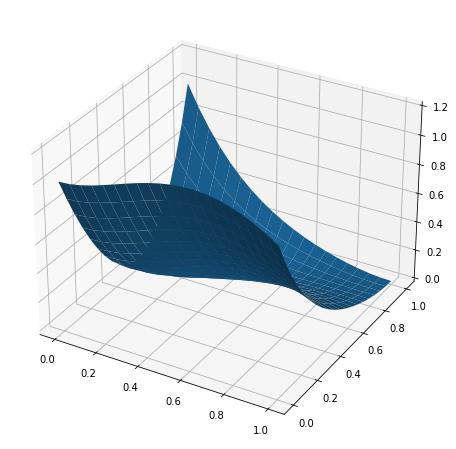

In [24]:
from matplotlib import pyplot as plt
import numpy as np
p = pl('s(a2)2-3s(a3b)').subs('c',1)
coor = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
z = [[float(p.subs('a',coor[0][i][j]).subs('b',coor[1][i][j])) for i in range(len(coor[0]))] for j in range(len(coor[1]))]

fig, ax = plt.subplots(1,1, figsize = (8, 8), subplot_kw={'projection': '3d'})
ax.plot_surface(coor[0], coor[1], np.array(z))
plt.show()

## Schur

当 $n\leqslant 8$
$$\sum a^{2n}(b+c)(a-b)(a-c)\geqslant \sum a(b-c)^2(b+c-a)^2(b^{n-1}+c^{n-1}-a^{n-1})^2$$

***

令 $E_n = \sum_{x+y+z=n}a^xb^yc^z$

$$\sum a^{n}(b+c)(a-b)(a-c)\prod (a+b)=4abc\sum a^{n-1}(a^2-b^2)(a^2-c^2) + \prod (a-b)^2\left(E_n + E_{n-2} \sum ab \right)$$

$$E_n = E_{n-1}\sum a - E_{n-2}\sum ab +E_{n-3}abc$$
<br>

***

$$\sum a^n(a-b)(a-c)\geqslant \frac{n+1}{n-3}E_{n-4}\prod (a-b)^2$$
只需证
$$E_n\geqslant \frac{n+1}{n-3}E_{n-4}\sum (a^2b^2-a^2bc)$$

证: 
$$\begin{aligned}E_n-\frac{n+1}{n-3}E_{n-4}\sum (a^2b^2-a^2bc)&
=\sum a^{n-2}(a-b)(a-c)+\frac{2}{n-3}\sum_{k=1}^{n-3} \sum ab\left(a^{n-2}+b^{n-2}-a^kb^{n-2-k}-a^{n-2-k}b^k \right)
\\ &+\frac{2n-2}{n-3}abc \sum_{k=1}^{n-4}\sum a^k b^{n-3-k}  +\frac{n+1}{n-3}abc\sum a^{n-3} + a^2b^2c^2E_{n-6}
\end{aligned}
$$

$$S_n = \sum a^{n-2}(a-b)(a-c)$$
$$2S_{n+2}-\sum aS_{n+1} - \sum (a^2-ab)\sum S_n +abcS_{n-1} +\prod (a-b)^2E_{n-4}=0$$

In [7]:
def euler(n = 4):
    n += 2
    a,b,c = sp.symbols('a b c')
    return sp.cancel(a**n/(a-b)/(a-c)+b**n/(b-c)/(b-a) + c**n/(c-a)/(c-b))
# n = 5
# swa(euler(n)-(n+1)*(euler(n-4)+0*pl('a*b*c')*euler(n-7))*pl('s(a2b2-a2bc)')/(n-3)-pl(f's(a^{n-2}(a-b)(a-c))+0s(a^{n-6}(a2-b2)(a2-c2))s(ab)'))
# 0
# # pl('a7+a6b+a5b2+a4b3+a3b4+a2b5+ab6+b7+c(s(a6+a5b+a4b2+a3b3+a2b4+ab5)+abcs(a3+a2b+ab2)+a2b2c2)-2s(a3+a2b+ab2+abc/3)s(a2b2-a2bc)-0s(a(b+c-a)2(b-c)4)-0(s(a5(a-b)(a-c))-0s(a)p(a-b)2)-0s(ab)s(a3(a-b)(a-c))').factor_list()
# (2*x**3-(a+b+c)*x**2-(a*a+b*b+c*c-a*b-b*c-c*a)*x+a*b*c).factor()

In [4]:
p,q,r,t,x,y,z,a,b,c = sp.symbols('p q r t x y z a b c')
p = 1
q = (1 - t*t)/3
expr = 's(a(a2c-ab2)(a2c-ab2-3abc))'
# expr = 's((a3c2+za2bc2)(a2-b2+u(ab-ac)+v(bc-ab)))+s((xa2c2+yabc2)((uv-1)(a2c-b2c)-(u2+v)(a2b-abc)+(v2+u)(ab2-abc)))'
part1, part2 = pqr_cyc(pl(expr).as_poly(a,b,c))
part1, part2 = [_.subs('p',1).subs('q',q).factor() for _ in (part1, part2)]
poly = ((part1)**2-part2**2*(pqr_ker()).subs('p',1).subs('q',q).factor()).factor().as_poly(r)
# poly

## Acyclic

$$\frac{a^2}{2a+4b}+\frac{2b^2+4}{ab+2}=2+\frac{2a^3(b-1)^2+a^2b(a-2)^2+4b(a+b)(a-2b)^2}{2(a+2b)^2(ab+2)}\geqslant 2$$

In [323]:
a, b, c = sp.symbols('a b c')
y_ = (a*a/(2*a+4*b)+(2*b*b+4)/(a*b+2))
# print(sp.solve((y_.diff(a), y_.diff(b))))
print((y_ - 2 -(2*a**3*(b-1)**2+a*a*b*(a-2)**2+4*b*(a+b)*(a-2*b)**2)/2/(a+2*b)**2/(a*b+2)).factor())

0


https://tieba.baidu.com/p/8199474729

(forever豪3)


$$abc(a+c)\sum a\left[\sum \frac{a^2}{b} - \sum a - \frac{4(a-b)^2}{\sum a}\right] = b(ab-c^2)^2(a+b+c)+ac(a-b)^2(a+c-b)^2$$

`(((s(a3c)s(a)-abcs(a)2-4(a-b)2abc))-((ab-c2)2b))(a+c)-(ab-c2)2b2`

In [51]:
# pl('(((s(a3c)s(a)-abcs(a)2-4(a-b)2abc))-((ab-c2)2b))(a+c)-(ab-c2)2b2').as_expr().factor()
# pl('(s(a3c)s(a)-abcs(a)2-4(a-b)2abc)').as_expr().subs(b,'c*c/a').factor()
# pl('(9s(a3)-3s(a)s(ab)-5s(a)(a-c)2)(2a+3b+2c)-3/4(2b-a-c)2(3b+2a+2c)2').as_expr().factor()

In [3]:
# (pqr_cyc(pl('s(a(a+b)(a+c))'))[0] / pqr_cyc(pl('p(a+b)'))[0]).subs(p,10).subs(r,q).subs(q,sp.S(125)/4)
# pqr_cyc(pl('p(a+b)'))[0]
# pqr_ker().subs(p,10).subs(r,q).factor()
# pqr_ker()
